# Project Overview
This project aims to leverage machine learning techniques to investigate disparities in the completion of substance use disorder (SUD) treatment. The primary objective is to develop predictive models capable of identifying individuals who are likely to successfully complete substance use treatment programs. To achieve this goal, the project will harness data from the Treatment Episode Data Set: Discharge (TEDS-D), sourced from the Substance Abuse and Mental Health Services Administration.

TEDS-D serves as a comprehensive national data repository, containing annual discharge records from various substance use treatment facilities. These records encompass a wide array of information on admissions for individuals aged 12 and above. Pertinent details include admission demographics such as age, sex, race/ethnicity, and employment status. Additionally, the dataset provides insights into substance use characteristics, including details about the types of substances used, age at first use, routes of use, frequency of use, and prior admissions.

The project's investigation is motivated by the mounting evidence of racial and ethnic disparities in SUD treatment services and outcomes. Despite a seemingly equal prevalence of SUDs among Whites, Latinos, and Blacks (with prevalence rates hovering around 8%), certain minority groups face a disproportionate burden. Notably, Latinos experience more severe alcohol-related problems compared to Whites, American Indians have elevated rates of injuries attributed to alcohol, and Blacks and Latinos face disproportionately high rates of alcohol-related injuries and mortality. Additionally, criminal justice consequences exhibit disparities, as Black individuals are more frequently arrested for drug possession despite similar rates of past month illicit drug use.

With SUDs negatively impacting racial and ethnic minority populations to a greater extent, the project emphasizes the critical need for equitable SUD treatment. The principles of precision medicine are employed, wherein individual patient characteristics are carefully considered to optimize treatment outcomes. This project underscores the potential of optimizing treatment pathways to yield the best possible outcomes—a domain where SUD treatment can make significant strides. For instance, alarming statistics reveal that a mere 19.8% of individuals requiring treatment for alcohol use disorders actually receive it.

By identifying key predictors of successful treatment and revealing disparities, this project seeks to illuminate strengths and weaknesses in service delivery. This analysis has the potential to boost treatment success rates, ultimately addressing unmet treatment needs. A pivotal first step involves predicting treatment success for a given individual. The project's significance is underscored by the extensive literature dedicated to identifying patient characteristics that enhance the efficacy of SUD treatment.

# EDA SUMMARY
Upon an initial exploratory analysis, it becomes apparent that the completion rates of clients undergoing treatment exhibit notable variations based on the type of treatment service or setting they are enrolled in during admission or transfer. Notably, Detox and 24-hour free-standing residential services exhibit the highest completion rates, which is in line with the rapid transitions typically observed in these settings. Given the project's focus, directing attention towards outpatient services seems prudent. This decision arises from the recognition that success criteria and durations significantly differ between outpatient services and other service types like 24-hour inpatient and detoxification.

A deeper examination of treatment completion rates between clients who reported alcohol use upon admission and those who did not reveals minimal differences. However, distinctive patterns emerge when assessing cocaine or crack use. Cocaine users demonstrate a lower completion rate compared to non-users, whereas marijuana users exhibit higher completion rates. The same trend applies to individuals reporting heroin use. These observations underscore the potential influence of reported drug use on treatment completion rates, prompting further exploration into the intricate relationships between drug usage patterns and treatment outcomes.

Additionally, the data indicates an improvement in completion rates beyond the age of 44, with the 12-14 age group displaying the lowest completion rate.

Furthermore, the boxplot analysis suggests that there could be disparities in the distribution of treatment facilities per area between cases of completed and incomplete treatment. Notably, regions with higher facilities per square mile tend to have higher treatment completion rates, aligning with expectations. This observation highlights potential challenges or limitations in terms of treatment facility accessibility, especially in densely populated or geographically constrained states.

Lastly, when examining specific states, it becomes evident that certain drugs are more prevalent in particular regions. These findings align with the earlier analysis, indicating that certain drugs are potentially associated with variations in treatment completion rates. This underscores the need for a more comprehensive understanding of the interplay between drug prevalence and treatment outcomes.

In [12]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading clean file

teds_no_prior_state_pop_complete = pd.read_csv("teds_no_prior_state_pop_complete.csv")
teds_no_prior_state_pop_complete.head()
teds_no_prior_state_pop_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503107 entries, 0 to 503106
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DISYR                       503107 non-null  int64  
 1   CASEID                      503107 non-null  int64  
 2   STFIPS                      503107 non-null  int64  
 3   SERVICES                    503107 non-null  int64  
 4   LOS                         503107 non-null  int64  
 5   NOPRIOR                     503107 non-null  int64  
 6   SERVICES_D                  503107 non-null  int64  
 7   REASON                      503107 non-null  int64  
 8   AGE                         503107 non-null  int64  
 9   ALCFLG                      503107 non-null  int64  
 10  COKEFLG                     503107 non-null  int64  
 11  MARFLG                      503107 non-null  int64  
 12  HERFLG                      503107 non-null  int64  
 13  METHFLG       

In [23]:
# List of categorical variables to be recoded
categorical_vars = ['SERVICES', 'SERVICES_D', 'ALCFLG', 'COKEFLG','MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 
                    'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 
                    'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'DIVISION', 'ALCDRUG']

# Define the mapping for each variable
mapping_dict = {
    'SERVICES': {1: "Detox, 24-hour, hospital inpatient", 2: "Detox, 24-hour, free-standing residential",
            3: "Rehab/residential, hospital (non-detox)", 4: "Rehab/residential, short term (30 days or fewer)", 5:"Rehab/residential, long term (more than 30 days)",
            6: "Ambulatory, intensive outpatient", 7: "Ambulatory, non-intensive outpatient", 8: "Ambulatory, detoxification "},
    'SERVICES_D': {1: "Detox, 24-hour, hospital inpatient", 2: "Detox, 24-hour, free-standing residential", 3:"Rehab/residential, hospital (non-detox)",
                   4: "Rehab/residential, short term (30 days or fewer)", 5:"Rehab/residential, long term (more than 30 days)",
                   6:"Ambulatory, intensive outpatient", 7:"Ambulatory, non-intensive outpatient", 8: "Ambulatory, detoxification"},
    'ALCFLG': {0: "Substance not reported", 1: "Substance reported", },
    'COKEFLG': {0: "Substance not reported", 1: "Substance reported", },
    'MARFLG': {0: "Substance not reported", 1: "Substance reported", },
    'HERFLG': {0: "Substance not reported", 1: "Substance reported", },
    'METHFLG': {0: "Substance not reported", 1: "Substance reported", },
    'OPSYNFLG': {0: "Substance not reported", 1: "Substance reported", },
    'PCPFLG': {0: "Substance not reported", 1: "Substance reported", },
    'HALLFLG': {0: "Substance not reported", 1: "Substance reported", },
    'MTHAMFLG': {0: "Substance not reported", 1: "Substance reported", },
    'AMPHFLG': {0: "Substance not reported", 1: "Substance reported", },
    'STIMFLG': {0: "Substance not reported", 1: "Substance reported", },
    'BENZFLG': {0: "Substance not reported", 1: "Substance reported", },
    'TRNQFLG': {0: "Substance not reported", 1: "Substance reported", },
    'BARBFLG': {0: "Substance not reported", 1: "Substance reported", },
    'SEDHPFLG': {0: "Substance not reported", 1: "Substance reported", },
    'INHFLG': {0: "Substance not reported", 1: "Substance reported", },
    'OTCFLG': {0: "Substance not reported", 1: "Substance reported", },
    'OTHERFLG': {0: "Substance not reported", 1: "Substance reported", },
    'DIVISION': {0: "US territories", 1: "New England", 2: "Middle Atlantic", 3: "East North Central", 4: "West North Central",
                5: "South Atlantic", 6: "East South Central", 7: "West South Central", 8: "Mountain", 9: "Pacific"},
    'REGION': {0: "U.S. territories", 1: "Northeast", 2: "Midwest", 3: "South", 4: "West"},
    'ALCDRUG': {0: "None", 1: "Alcohol only", 2: "Other drugs only", 3: "Alcohol and other drugs"},
}

# Loop through each variable and apply the mapping
for var in categorical_vars:
    teds_no_prior_state_pop_complete[f'{var}_Recoded'] = teds_no_prior_state_pop_complete[var].map(mapping_dict[var])


In [27]:
# Creating a treatment completion variable based on Reason
completion_mapping = {
    1: "Completed",
    2: "Incomplete",
    3: "Incomplete",
    4: "Incomplete",
    5: "Incomplete",
    6: "Incomplete",
    7: "Incomplete"
}

teds_no_prior_state_pop_complete['Completion_Status'] = teds_no_prior_state_pop_complete['REASON'].map(completion_mapping)

# Check the distribution of the new variable & percent complete treatment
print(teds_no_prior_state_pop_complete['Completion_Status'].value_counts())
percentage_completed = (teds_no_prior_state_pop_complete['Completion_Status'].value_counts()['Completed'] / len(teds_no_prior_state_pop_complete)) * 100
print(f"Percentage of completions: {percentage_completed:.2f}%")



Incomplete    309946
Completed     193161
Name: Completion_Status, dtype: int64
Percentage of completions: 38.39%


In [21]:
# Define the mapping for length of stay categories
los_mapping = {
    **{i: "1-30 days" for i in range(1, 31)},
    31: "31-45 days",
    32: "46-60 days",
    33: "61-90 days",
    34: "91-120 days",
    35: "121-180 days",
    36: "181-365 days",
    37: "More than 365 days"
}

# Create a new variable "Length_of_Stay" based on the mapping
teds_no_prior_state_pop_complete['Length_of_Stay'] = teds_no_prior_state_pop_complete['LOS'].map(los_mapping)

# Check the distribution of the new variable
print(teds_no_prior_state_pop_complete['Length_of_Stay'].value_counts())



1-30 days             243554
181-365 days           49439
61-90 days             44830
91-120 days            40180
121-180 days           39937
31-45 days             30834
More than 365 days     29591
46-60 days             24742
Name: Length_of_Stay, dtype: int64


In [57]:
teds_no_prior_state_pop_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503107 entries, 0 to 503106
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DISYR                       503107 non-null  int64  
 1   CASEID                      503107 non-null  int64  
 2   STFIPS                      503107 non-null  int64  
 3   SERVICES                    503107 non-null  int64  
 4   LOS                         503107 non-null  int64  
 5   NOPRIOR                     503107 non-null  int64  
 6   SERVICES_D                  503107 non-null  int64  
 7   REASON                      503107 non-null  int64  
 8   AGE                         503107 non-null  int64  
 9   ALCFLG                      503107 non-null  int64  
 10  COKEFLG                     503107 non-null  int64  
 11  MARFLG                      503107 non-null  int64  
 12  HERFLG                      503107 non-null  int64  
 13  METHFLG       

In [13]:
# Define the age groups and their labels
age_groups = {
    1: "12–14 years",
    2: "15–17 years",
    3: "18–20 years",
    4: "21–24 years",
    5: "25–29 years",
    6: "30–34 years",
    7: "35–39 years",
    8: "40–44 years",
    9: "45–49 years",
    10: "50–54 years",
    11: "55–64 years",
    12: "65–95 years"
}

# Create a new categorical variable "Age_Group" based on "AGE"
teds_no_prior_state_pop_complete['Age_Group'] = teds_no_prior_state_pop_complete['AGE'].map(age_groups)

# Check the distribution of the new variable
print(teds_no_prior_state_pop_complete['Age_Group'].value_counts())


30–34 years    87933
25–29 years    86399
35–39 years    71976
40–44 years    51129
21–24 years    44072
55–64 years    42308
45–49 years    37891
50–54 years    33859
18–20 years    18309
15–17 years    17093
65–95 years     7440
12–14 years     4698
Name: Age_Group, dtype: int64


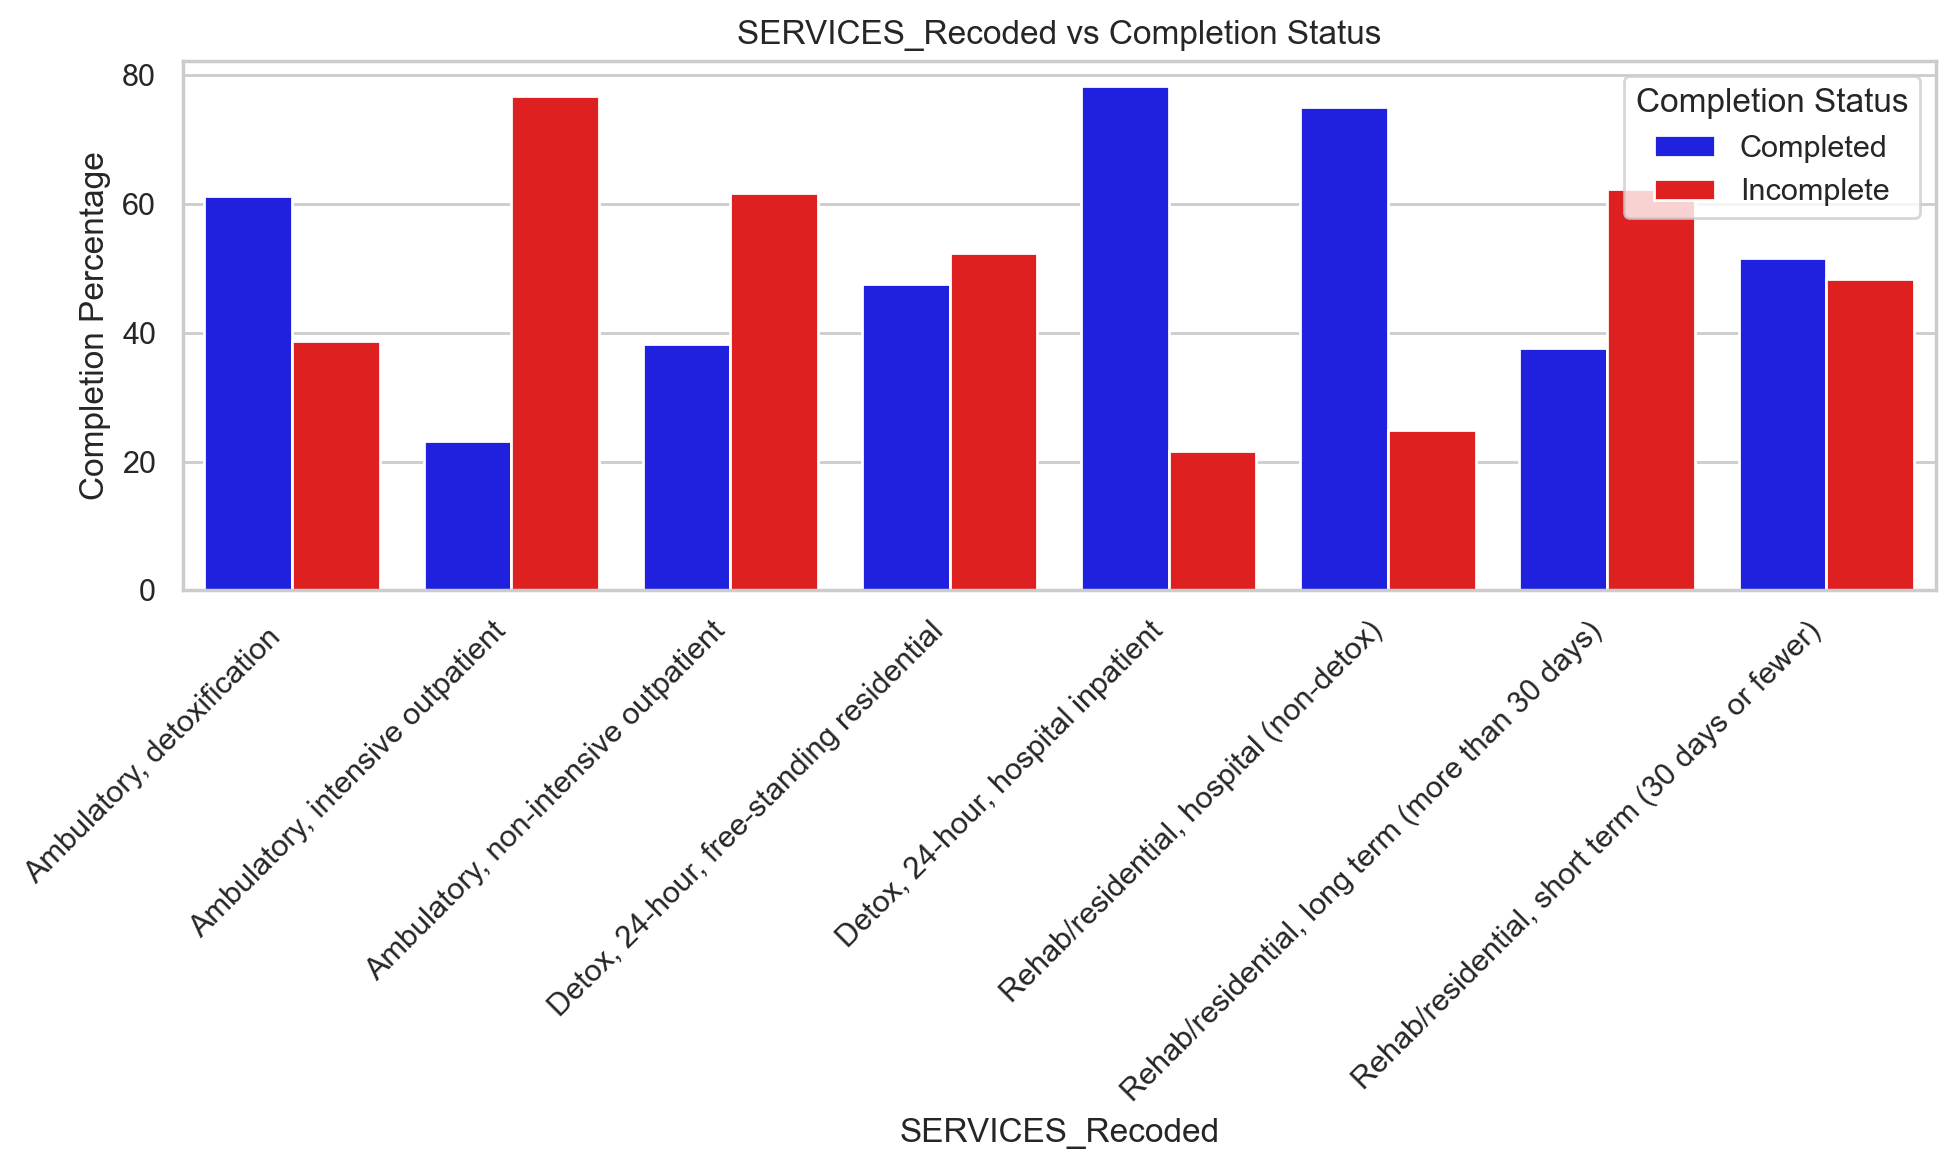

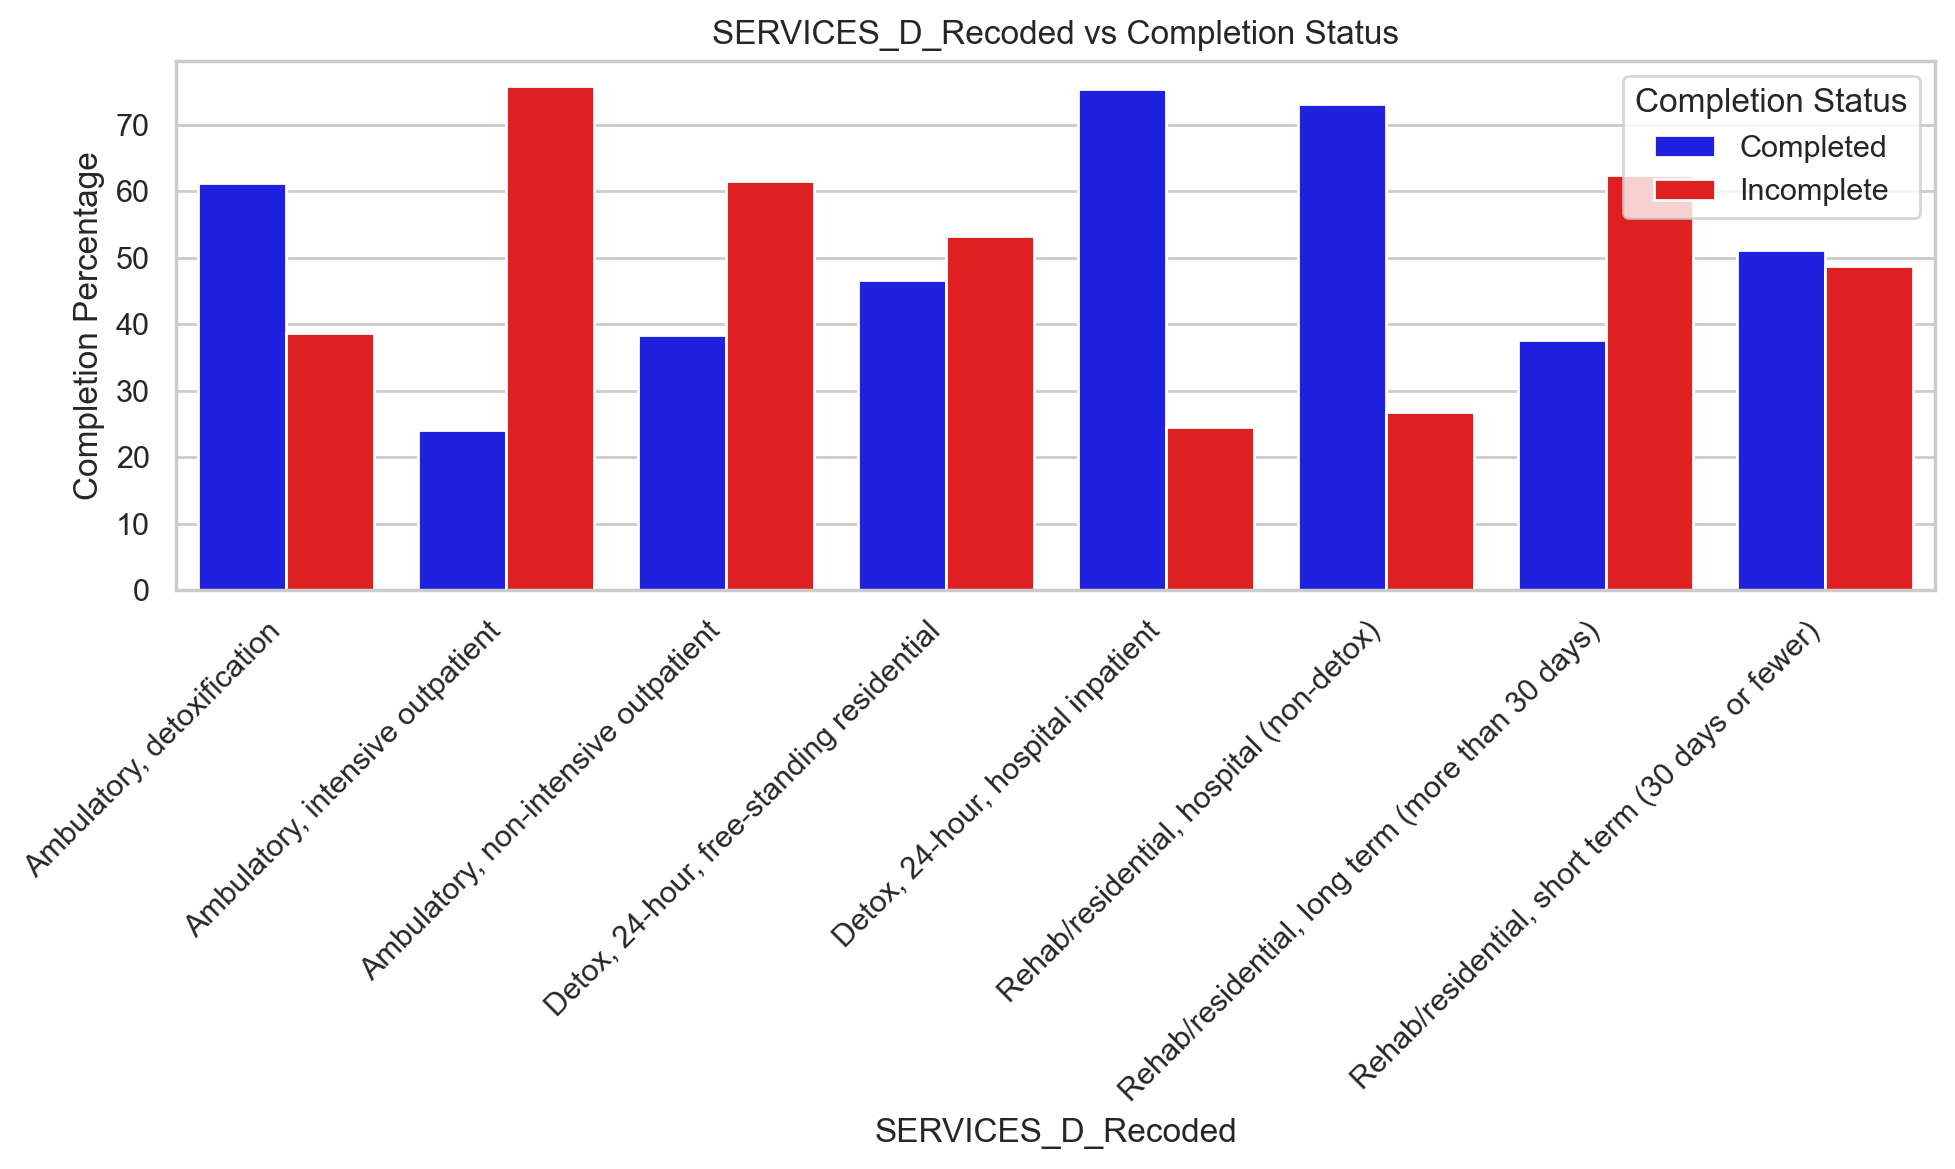

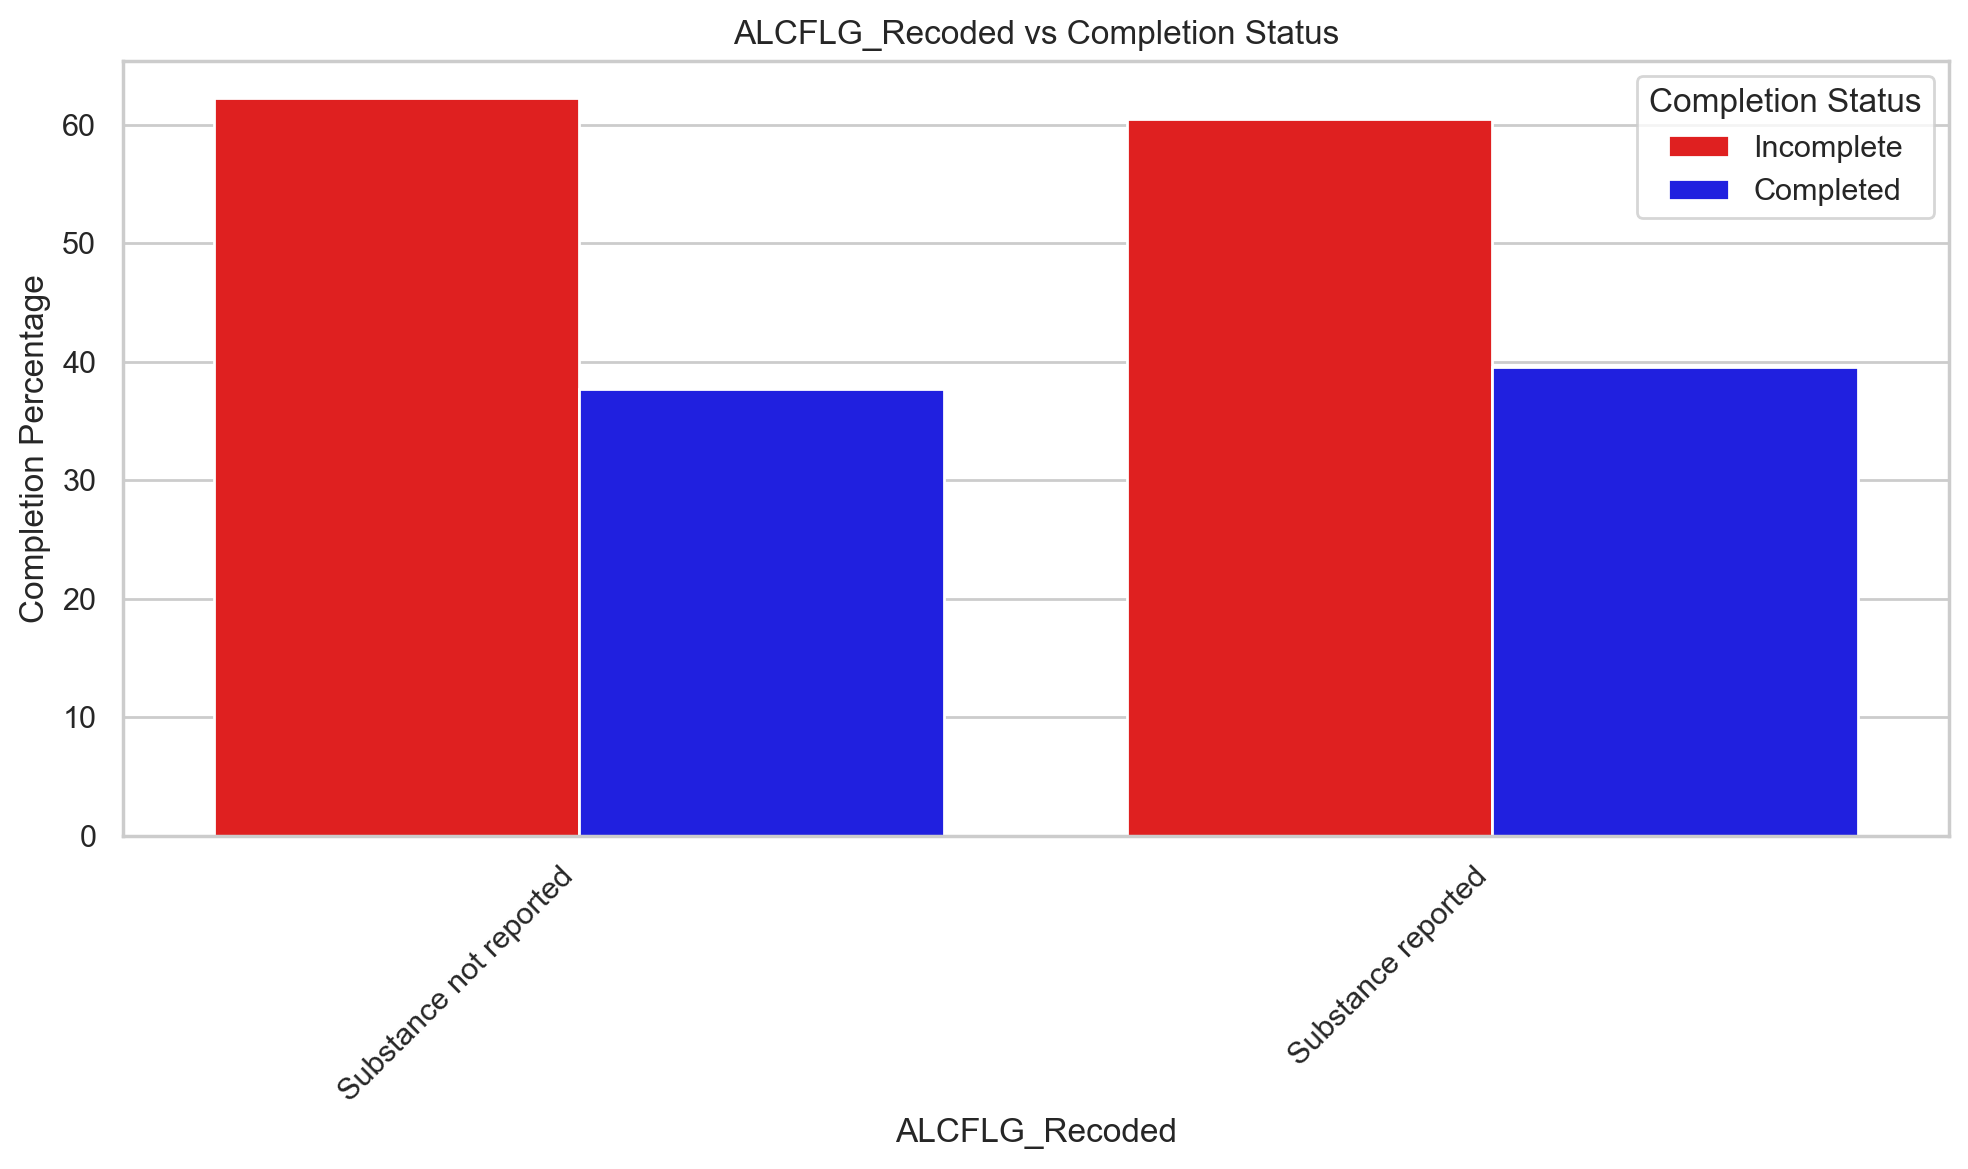

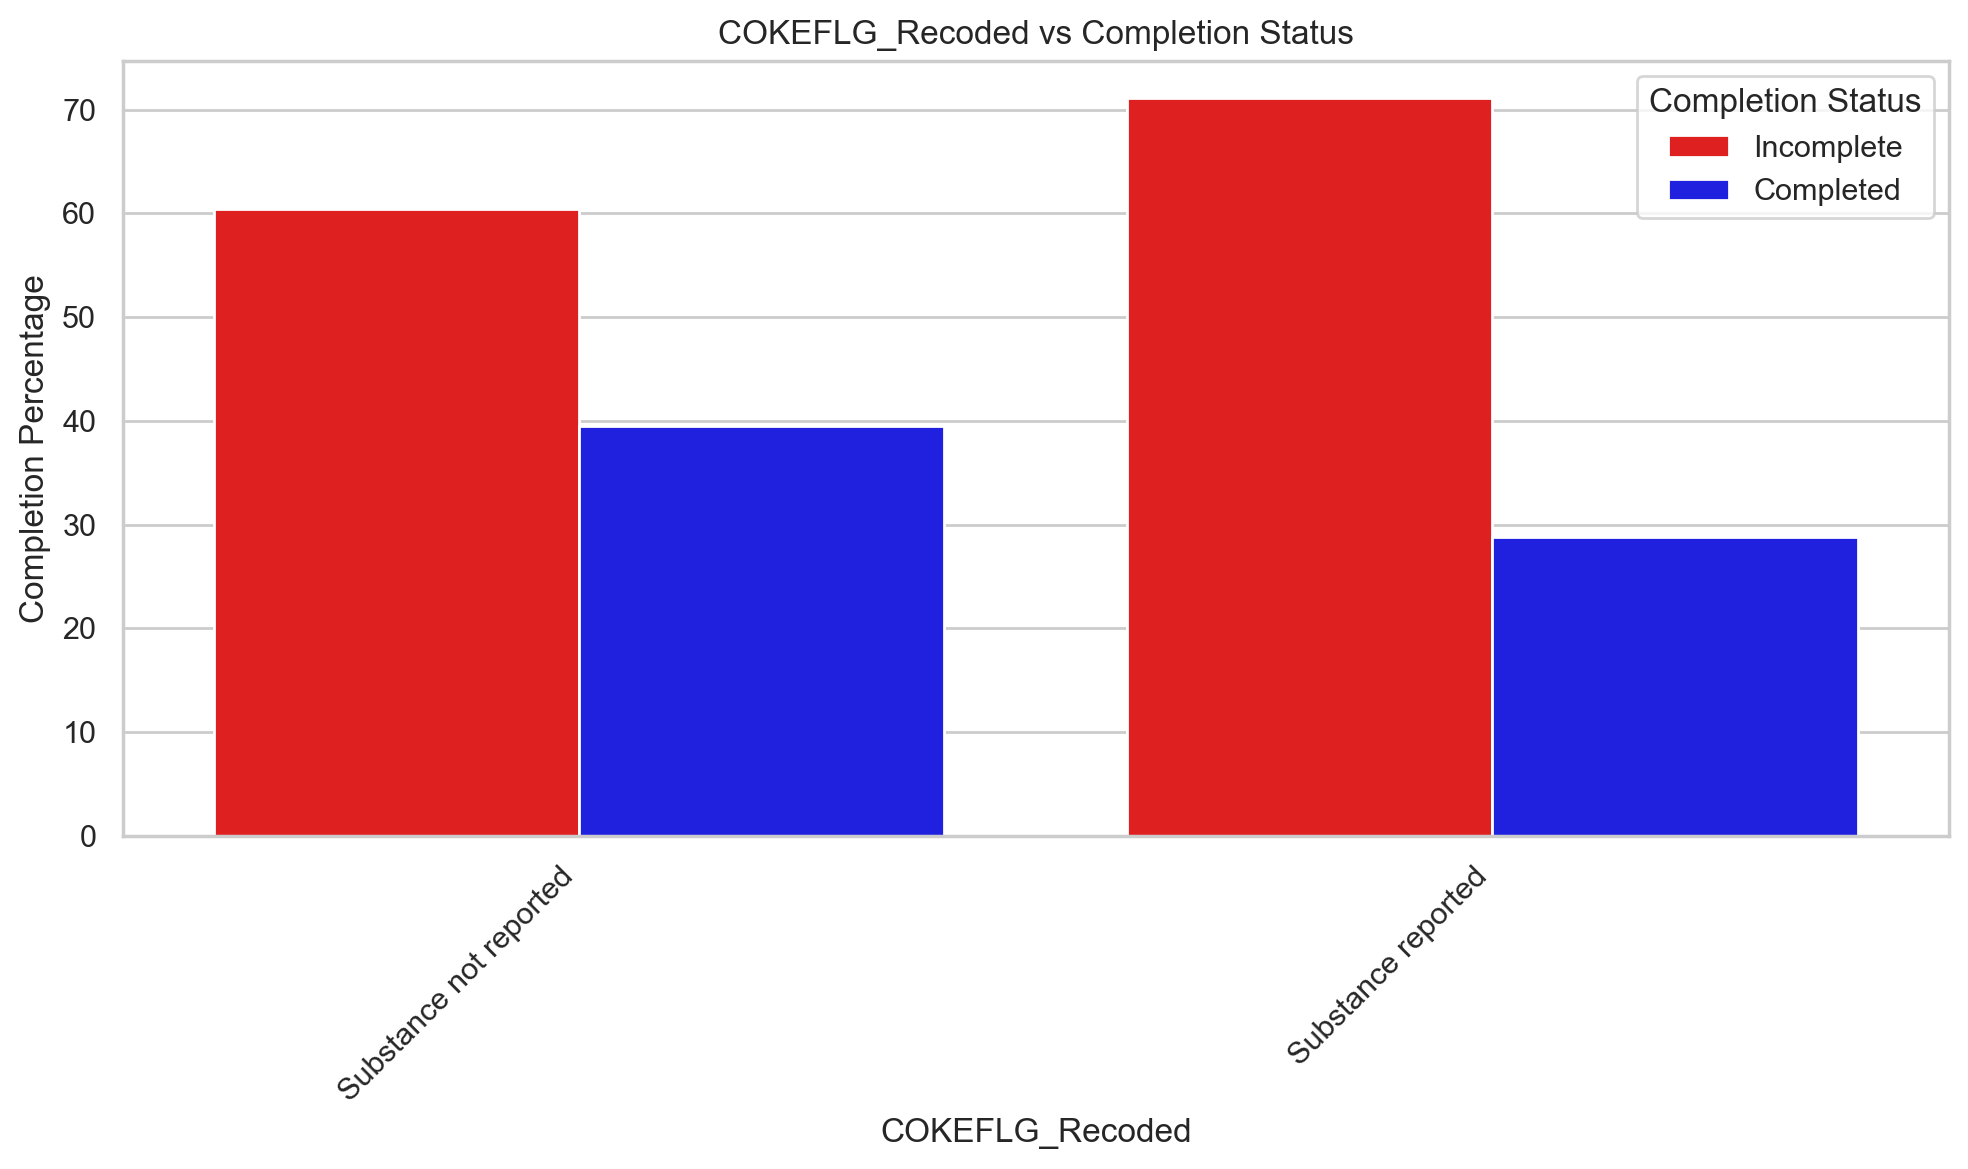

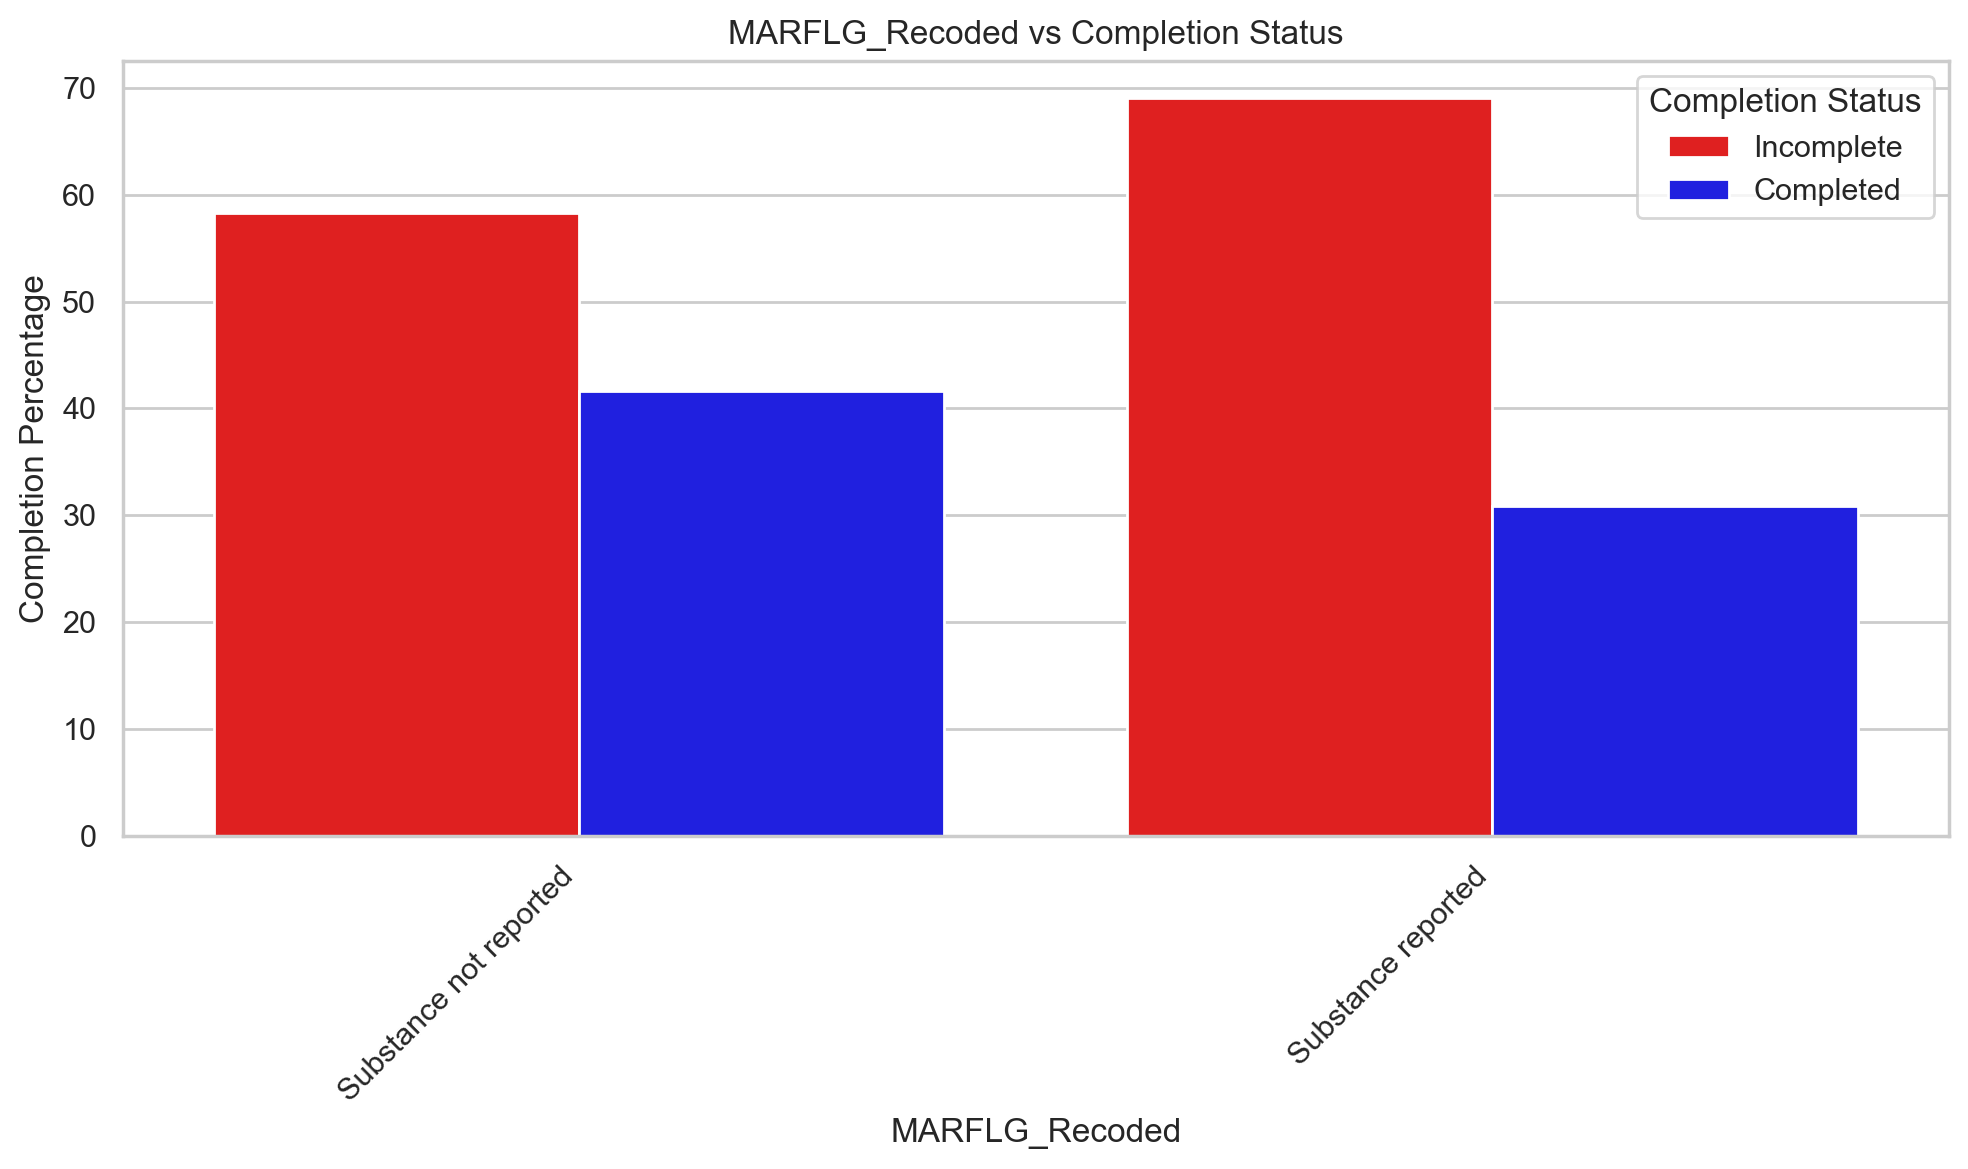

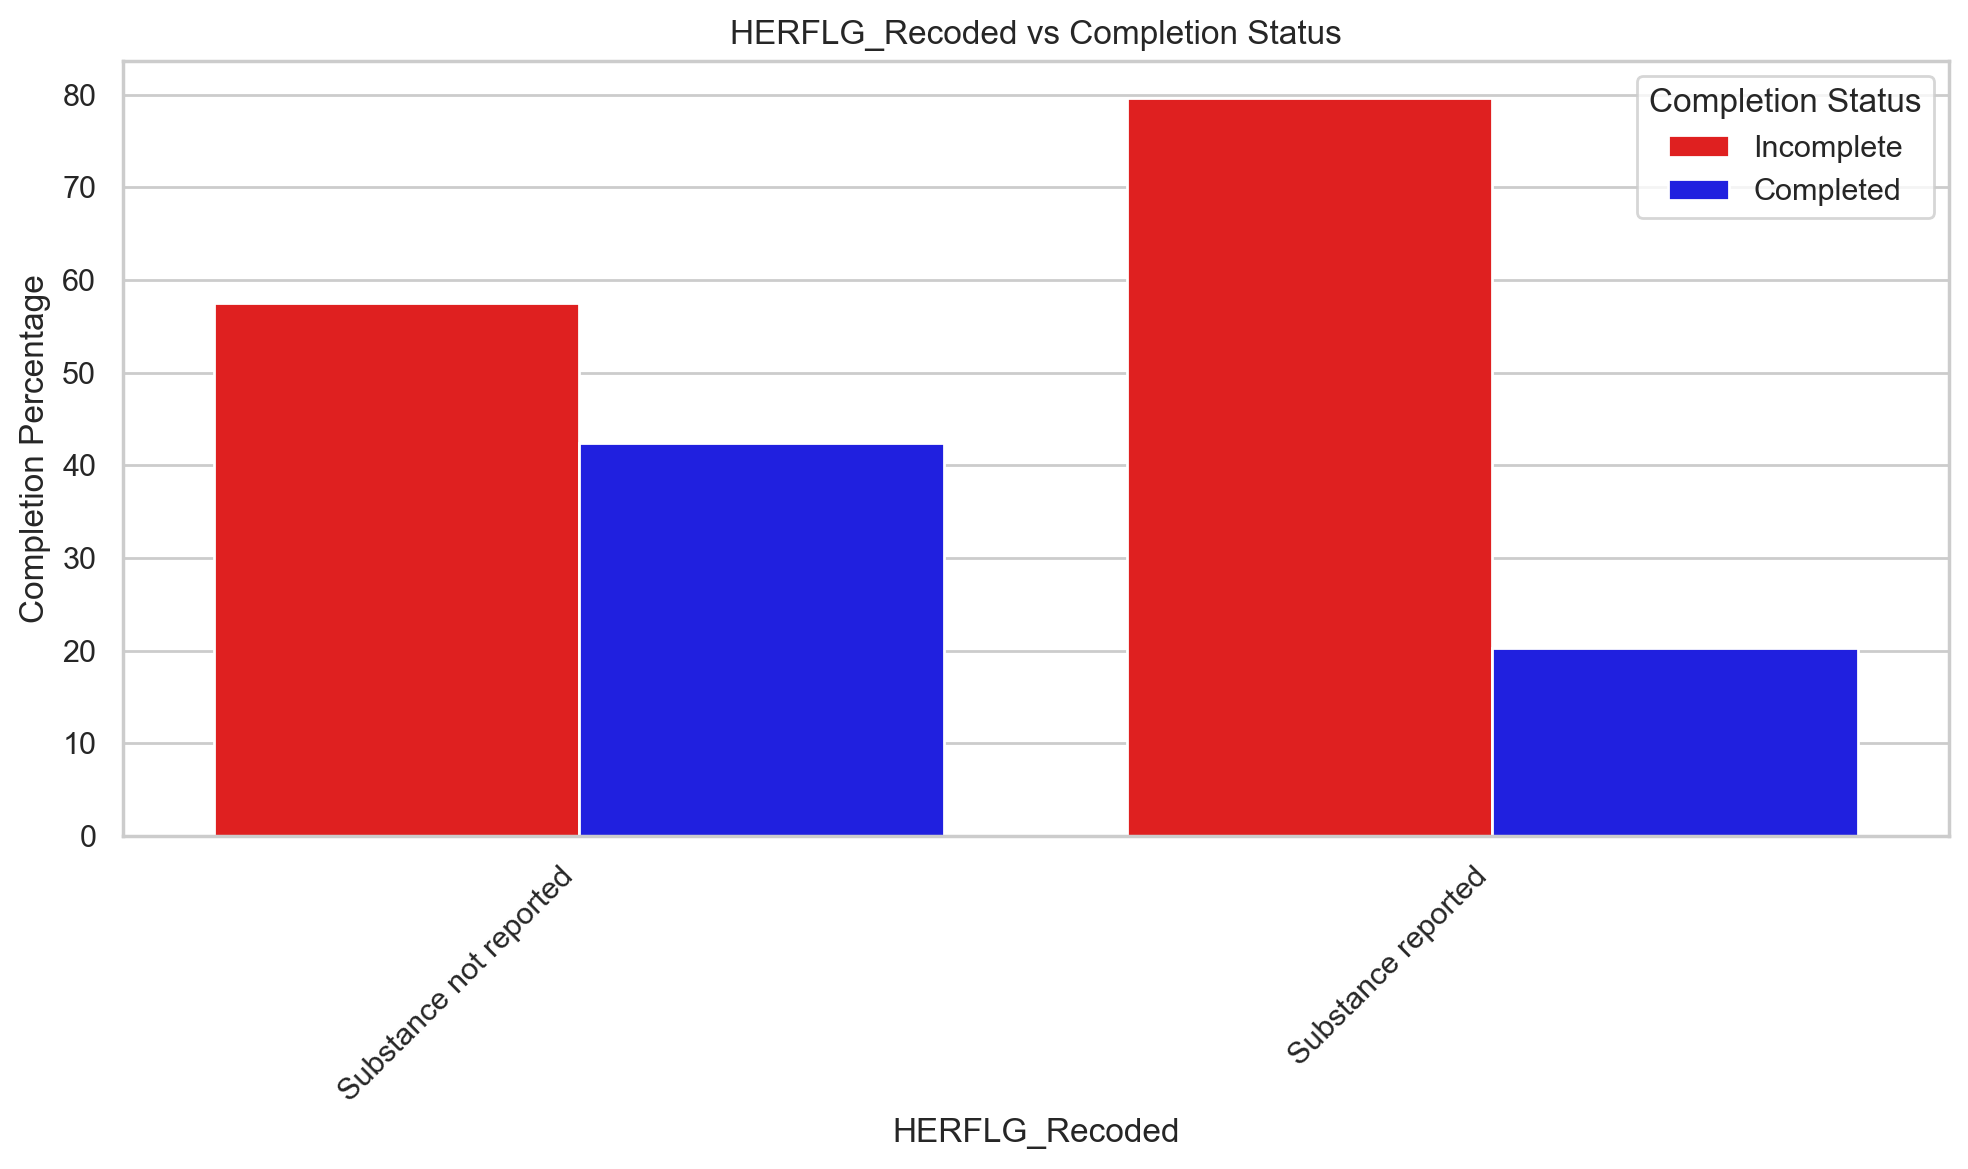

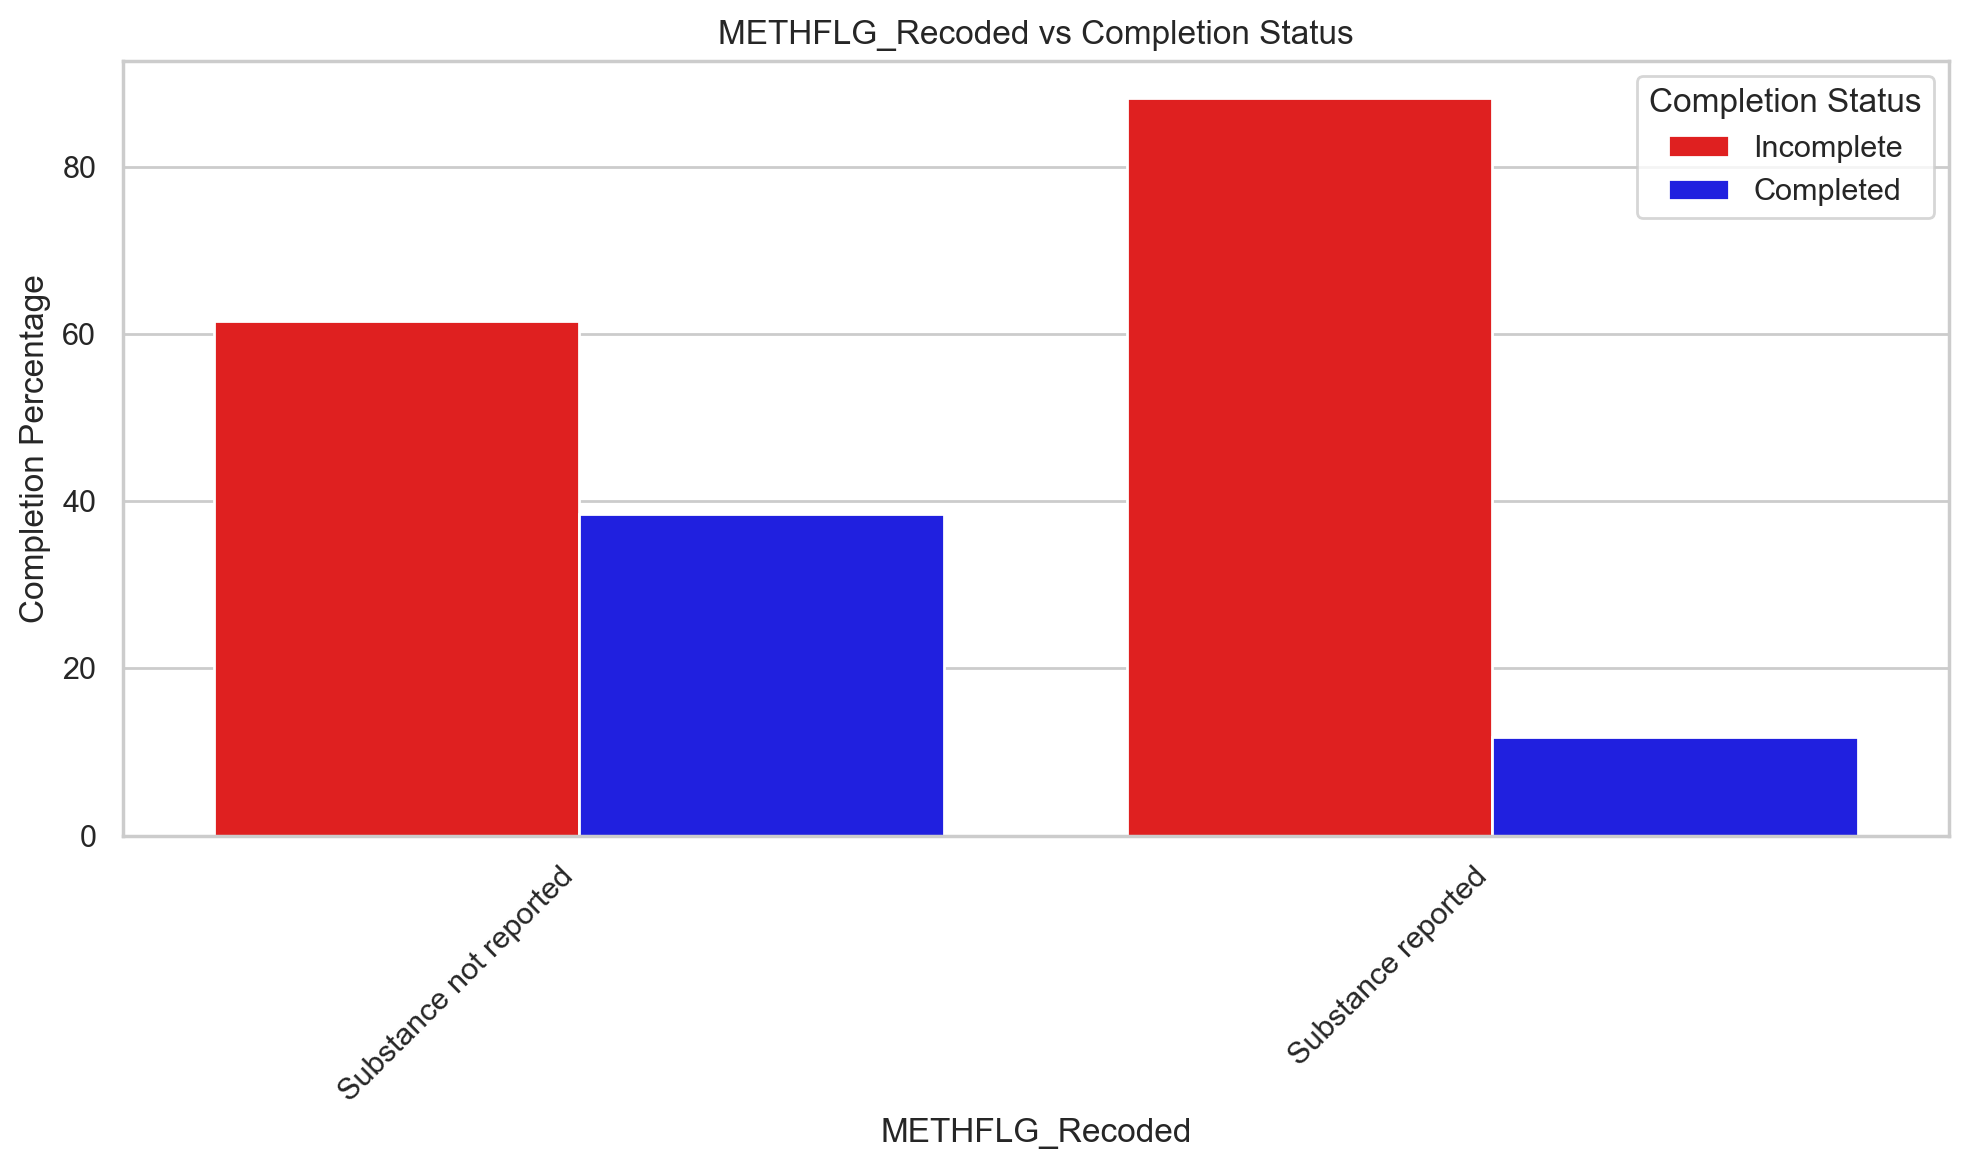

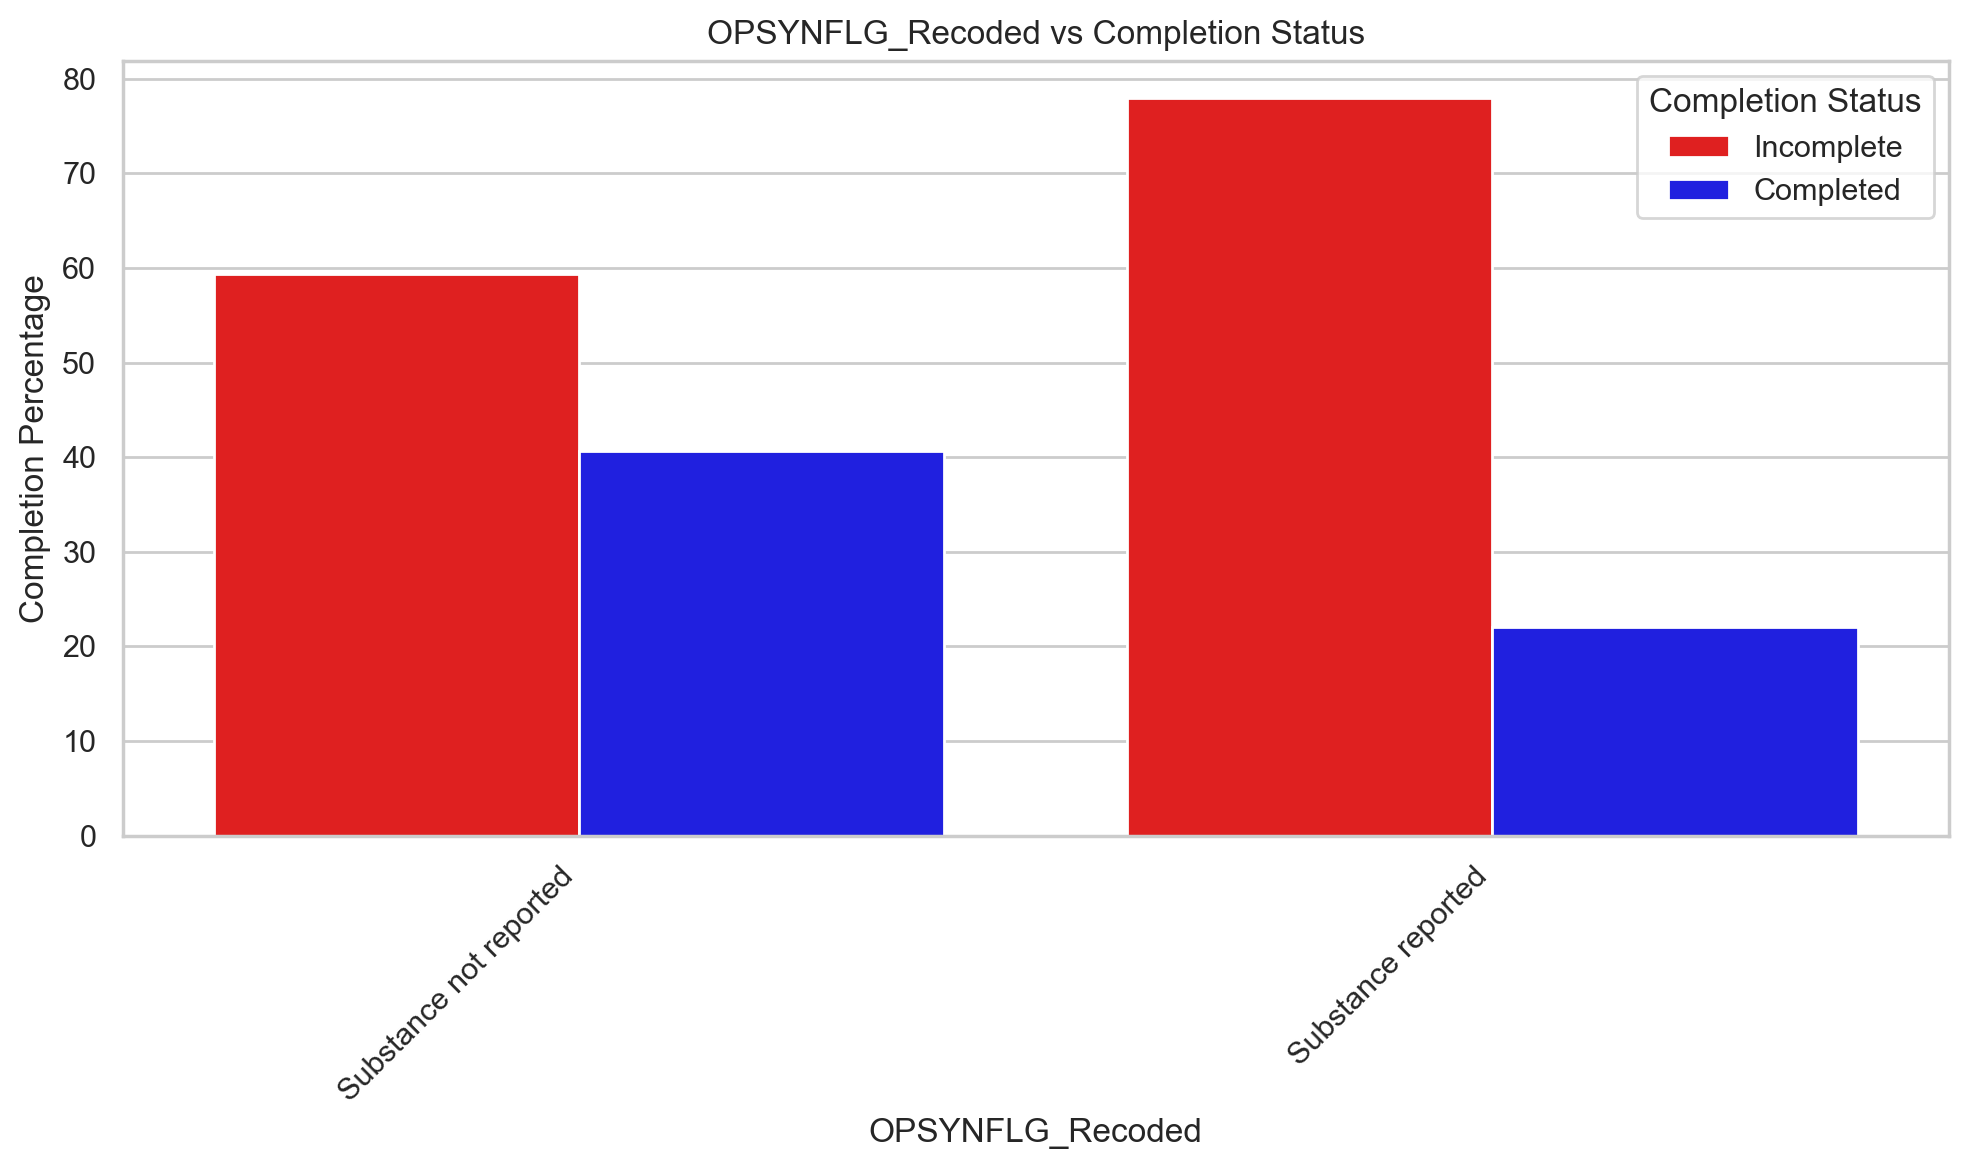

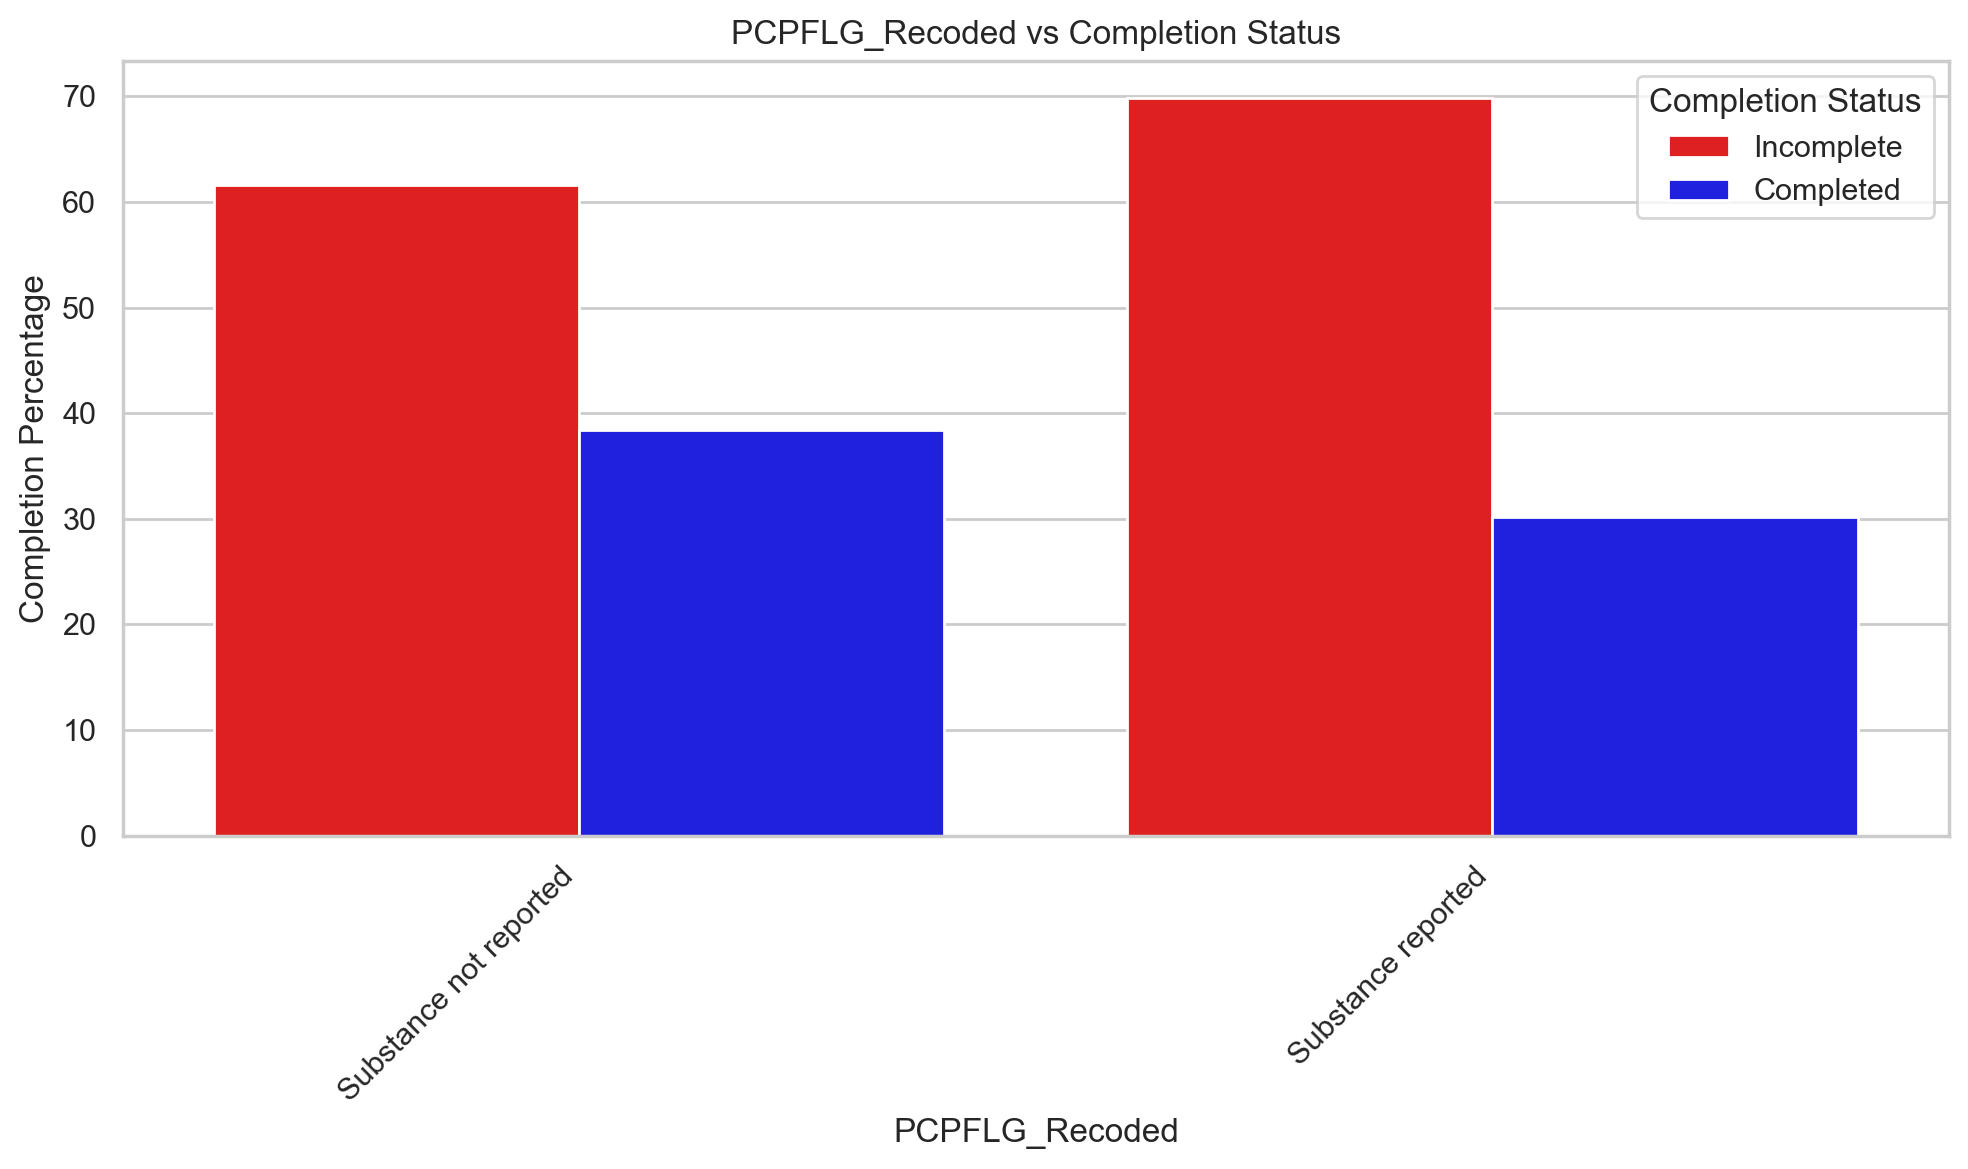

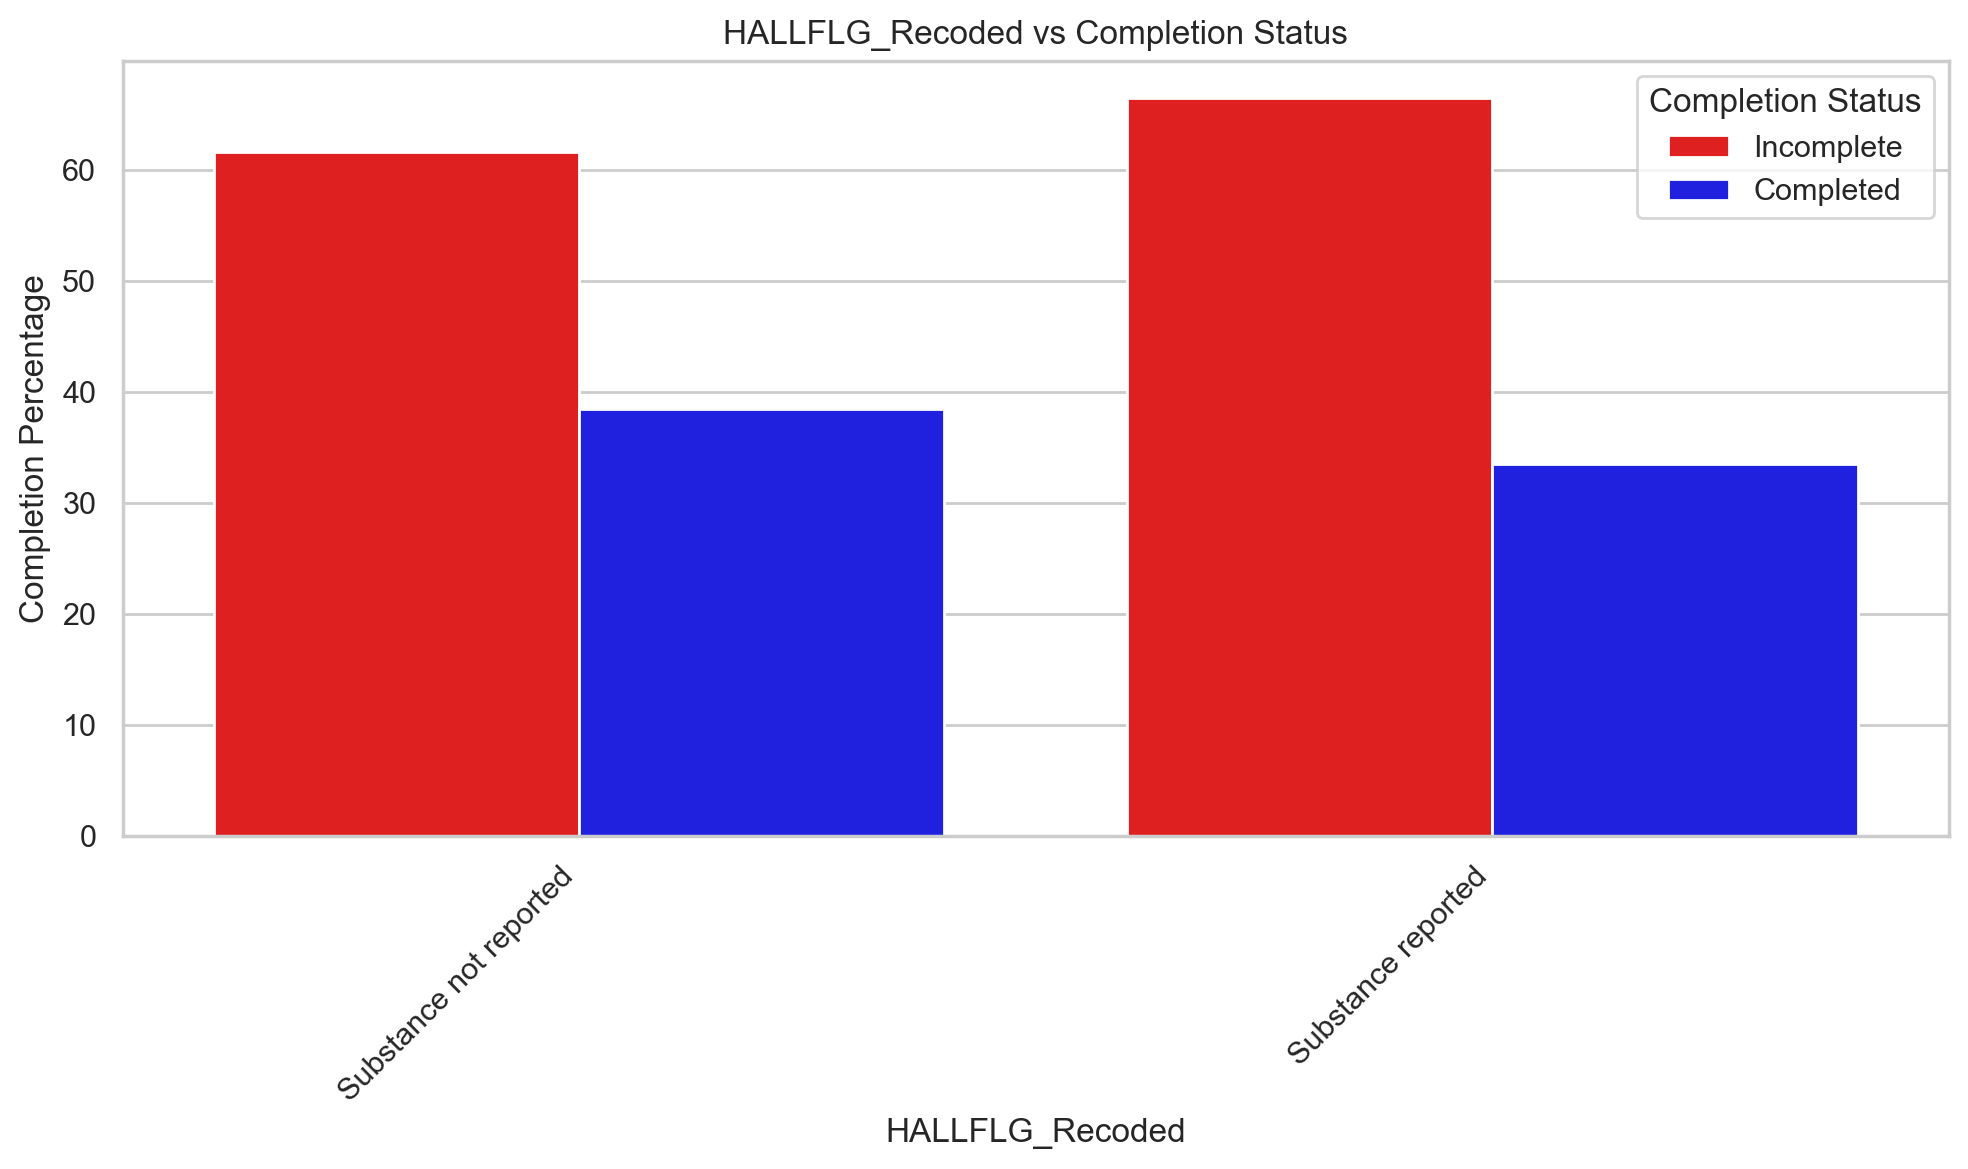

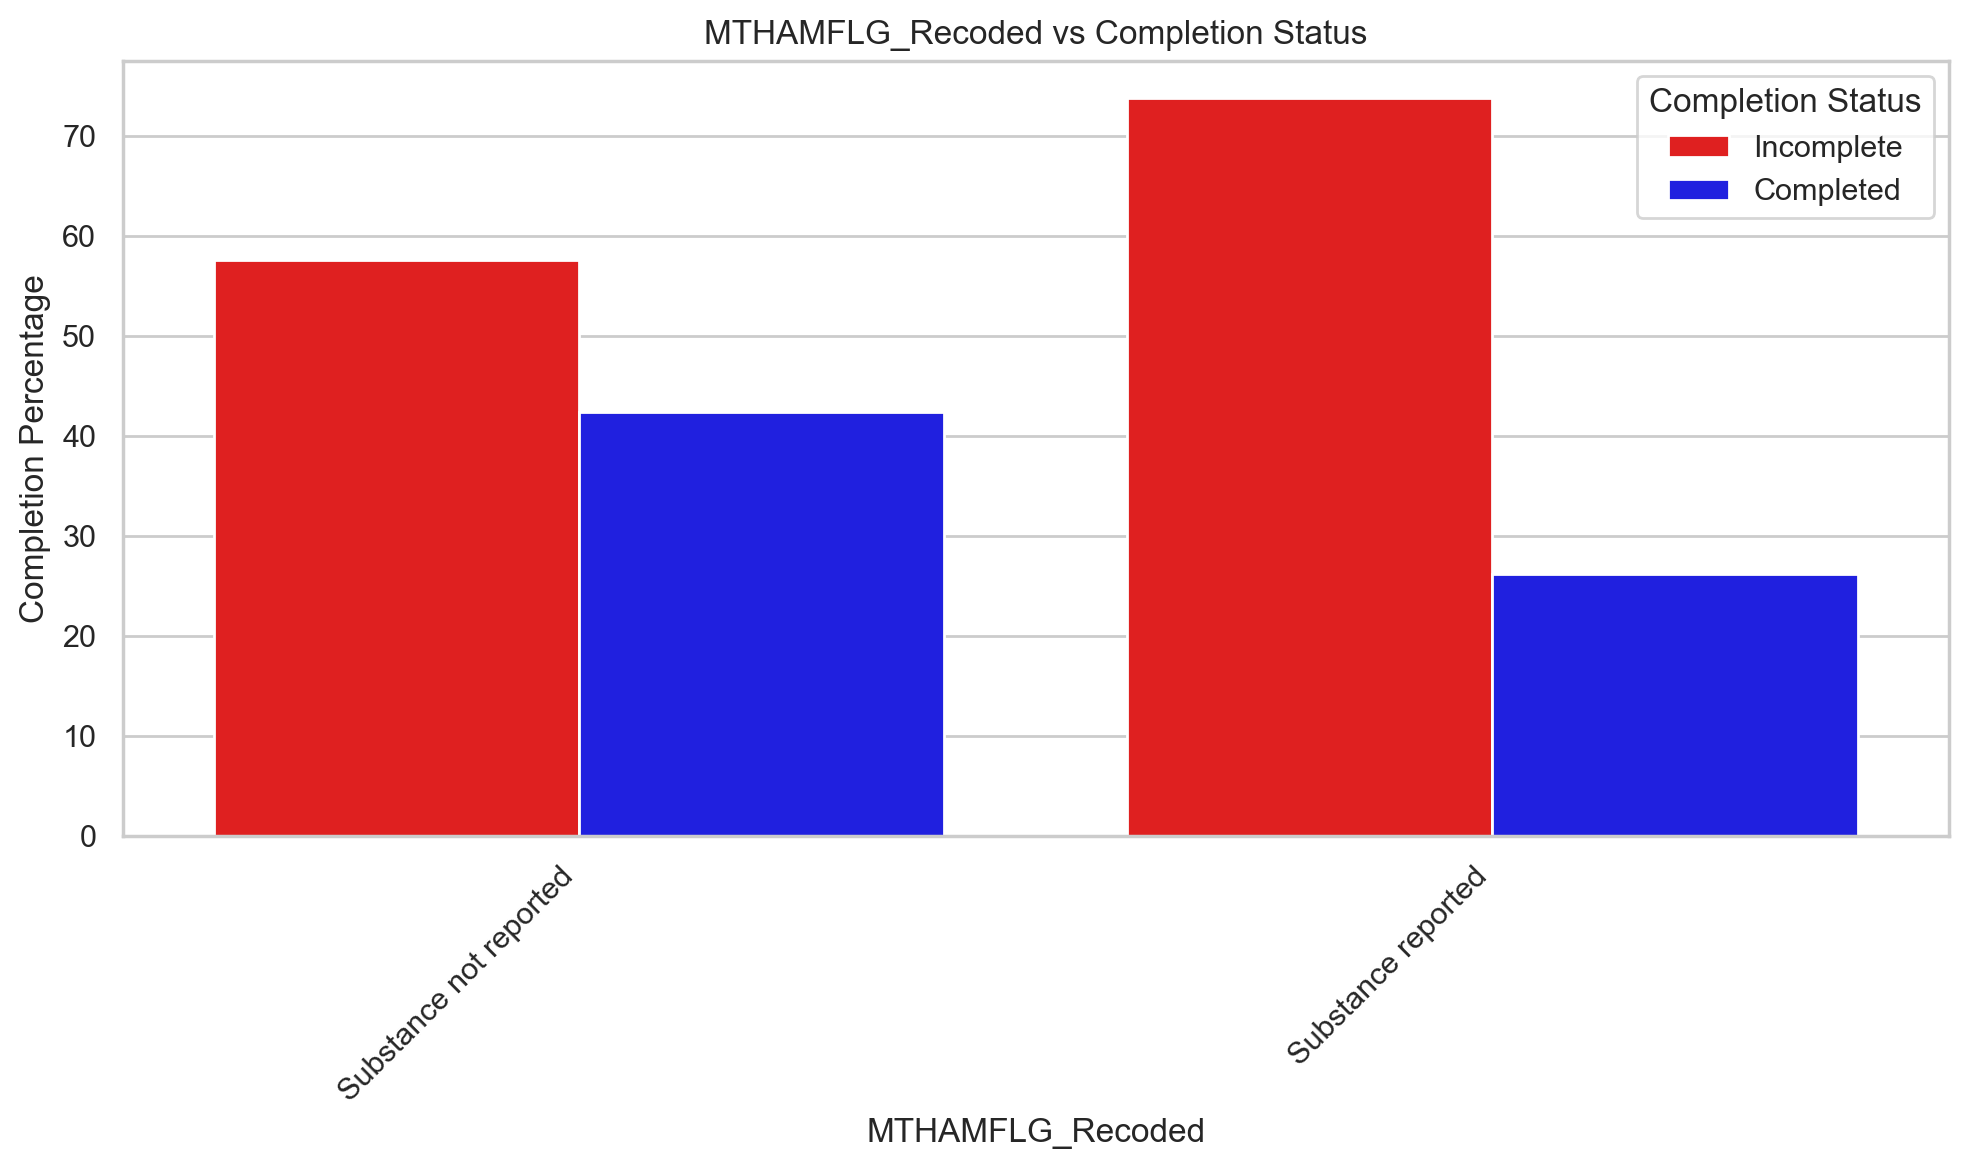

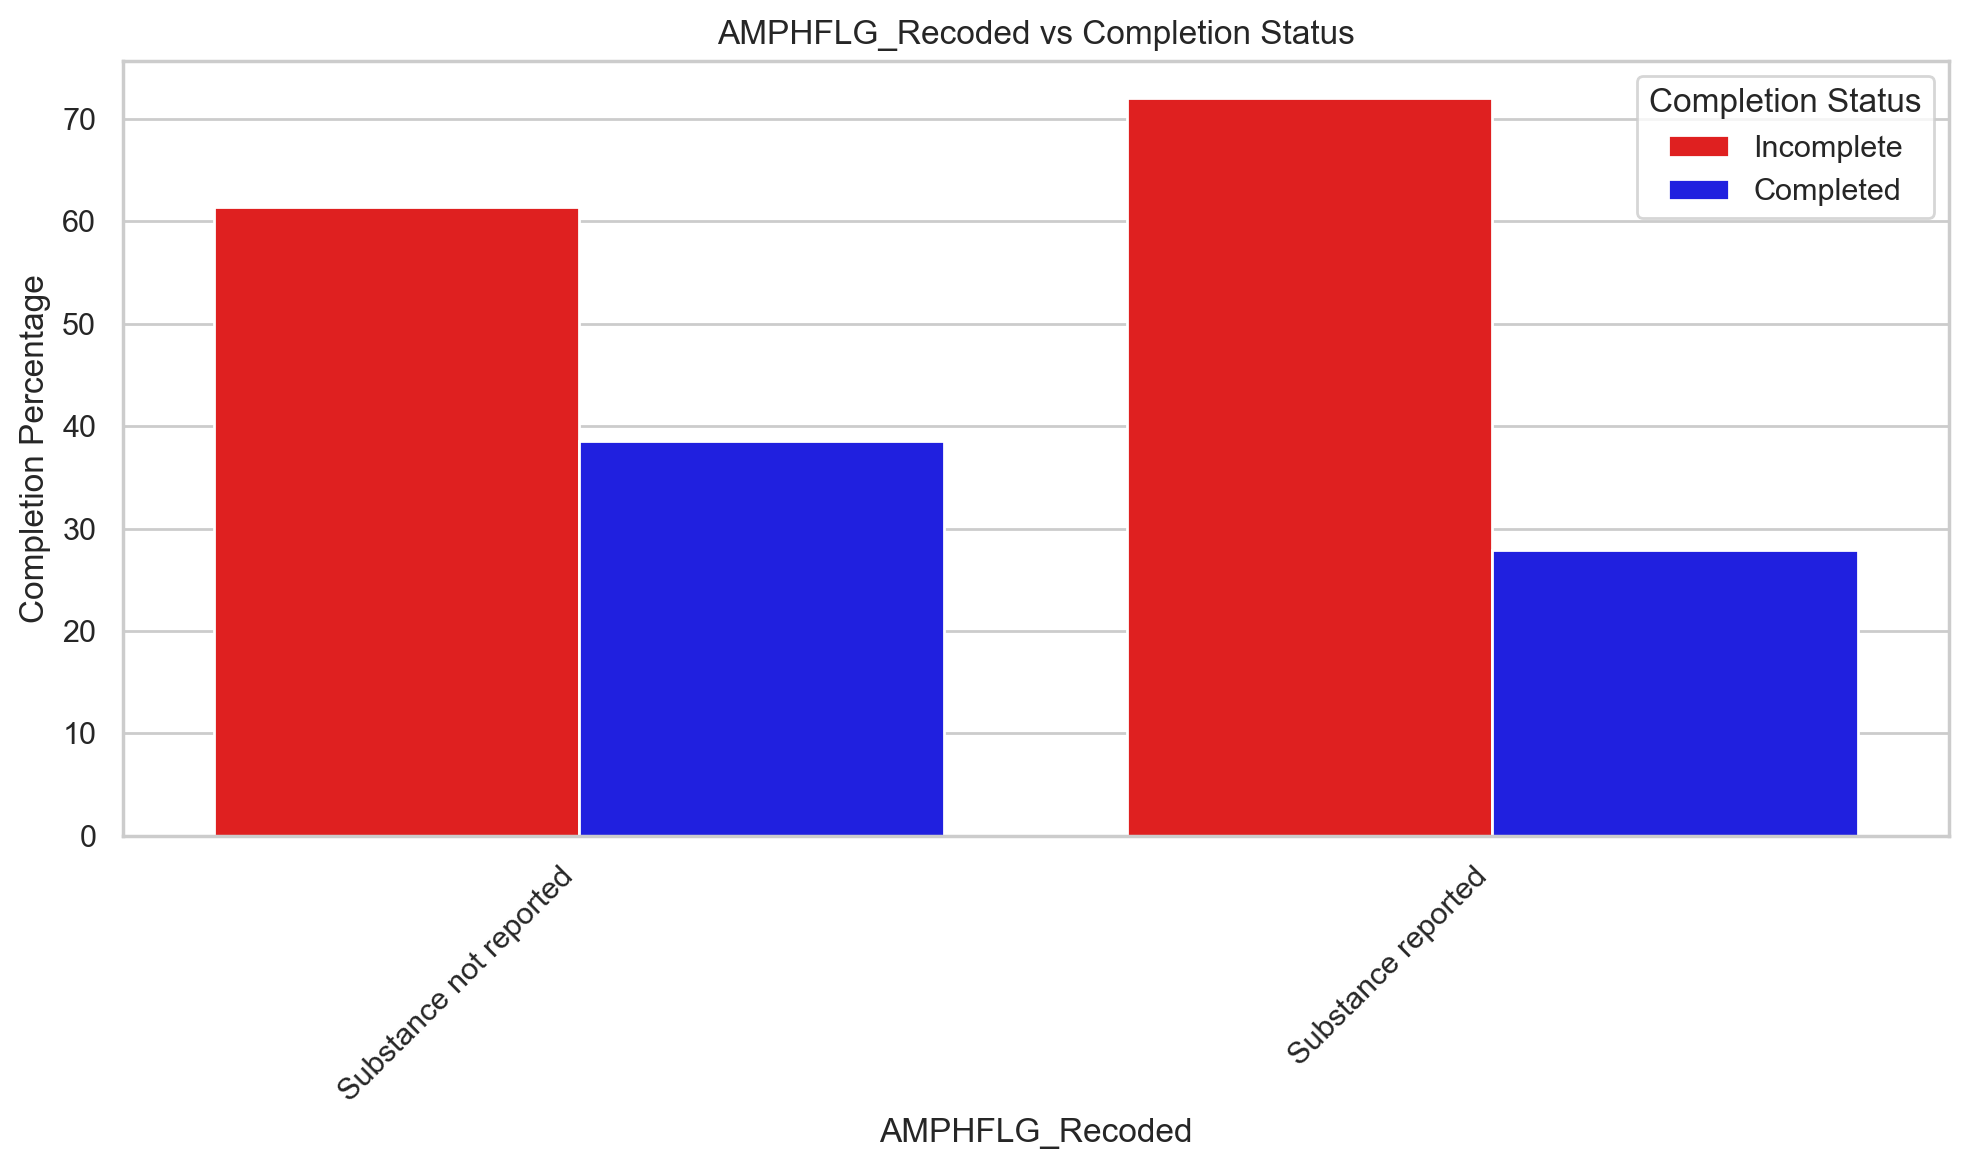

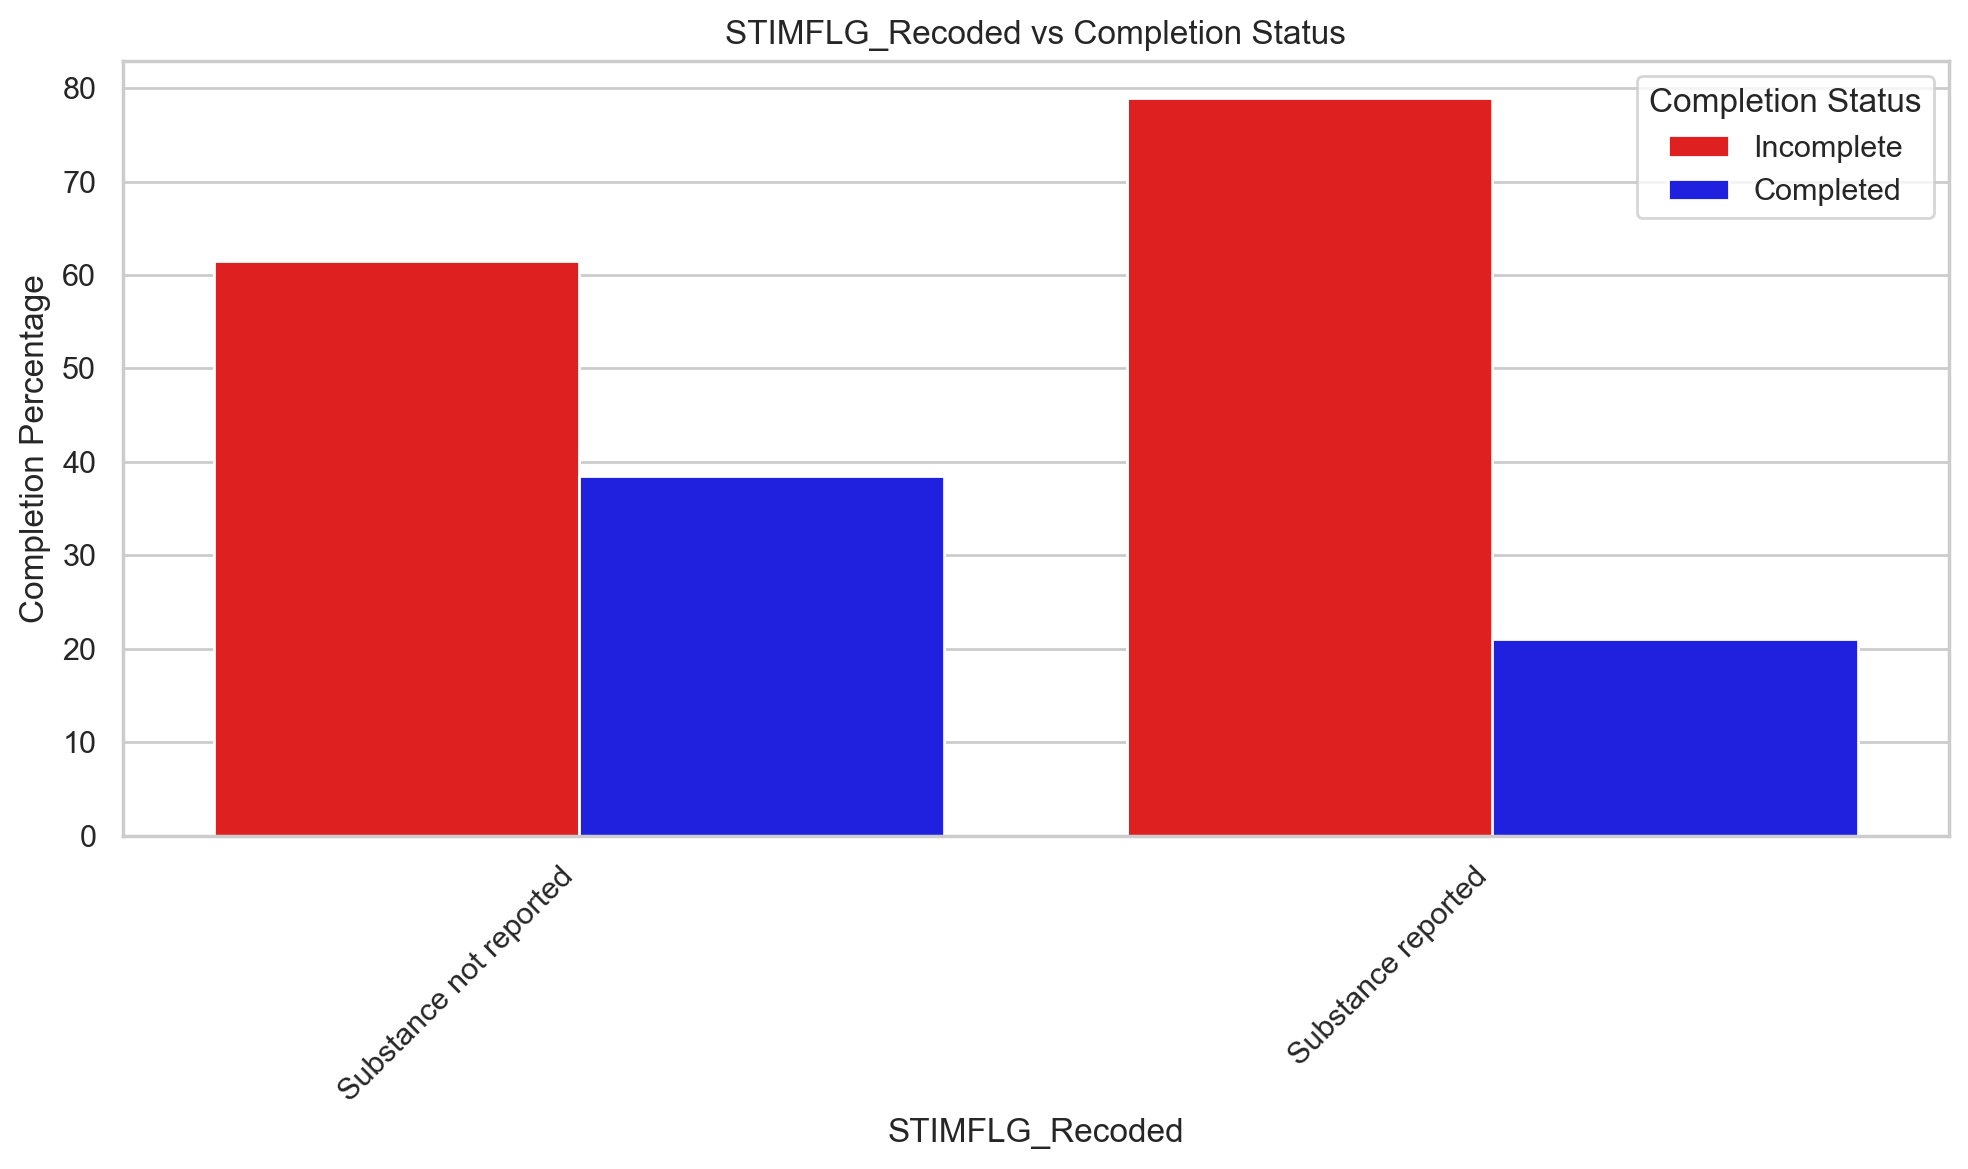

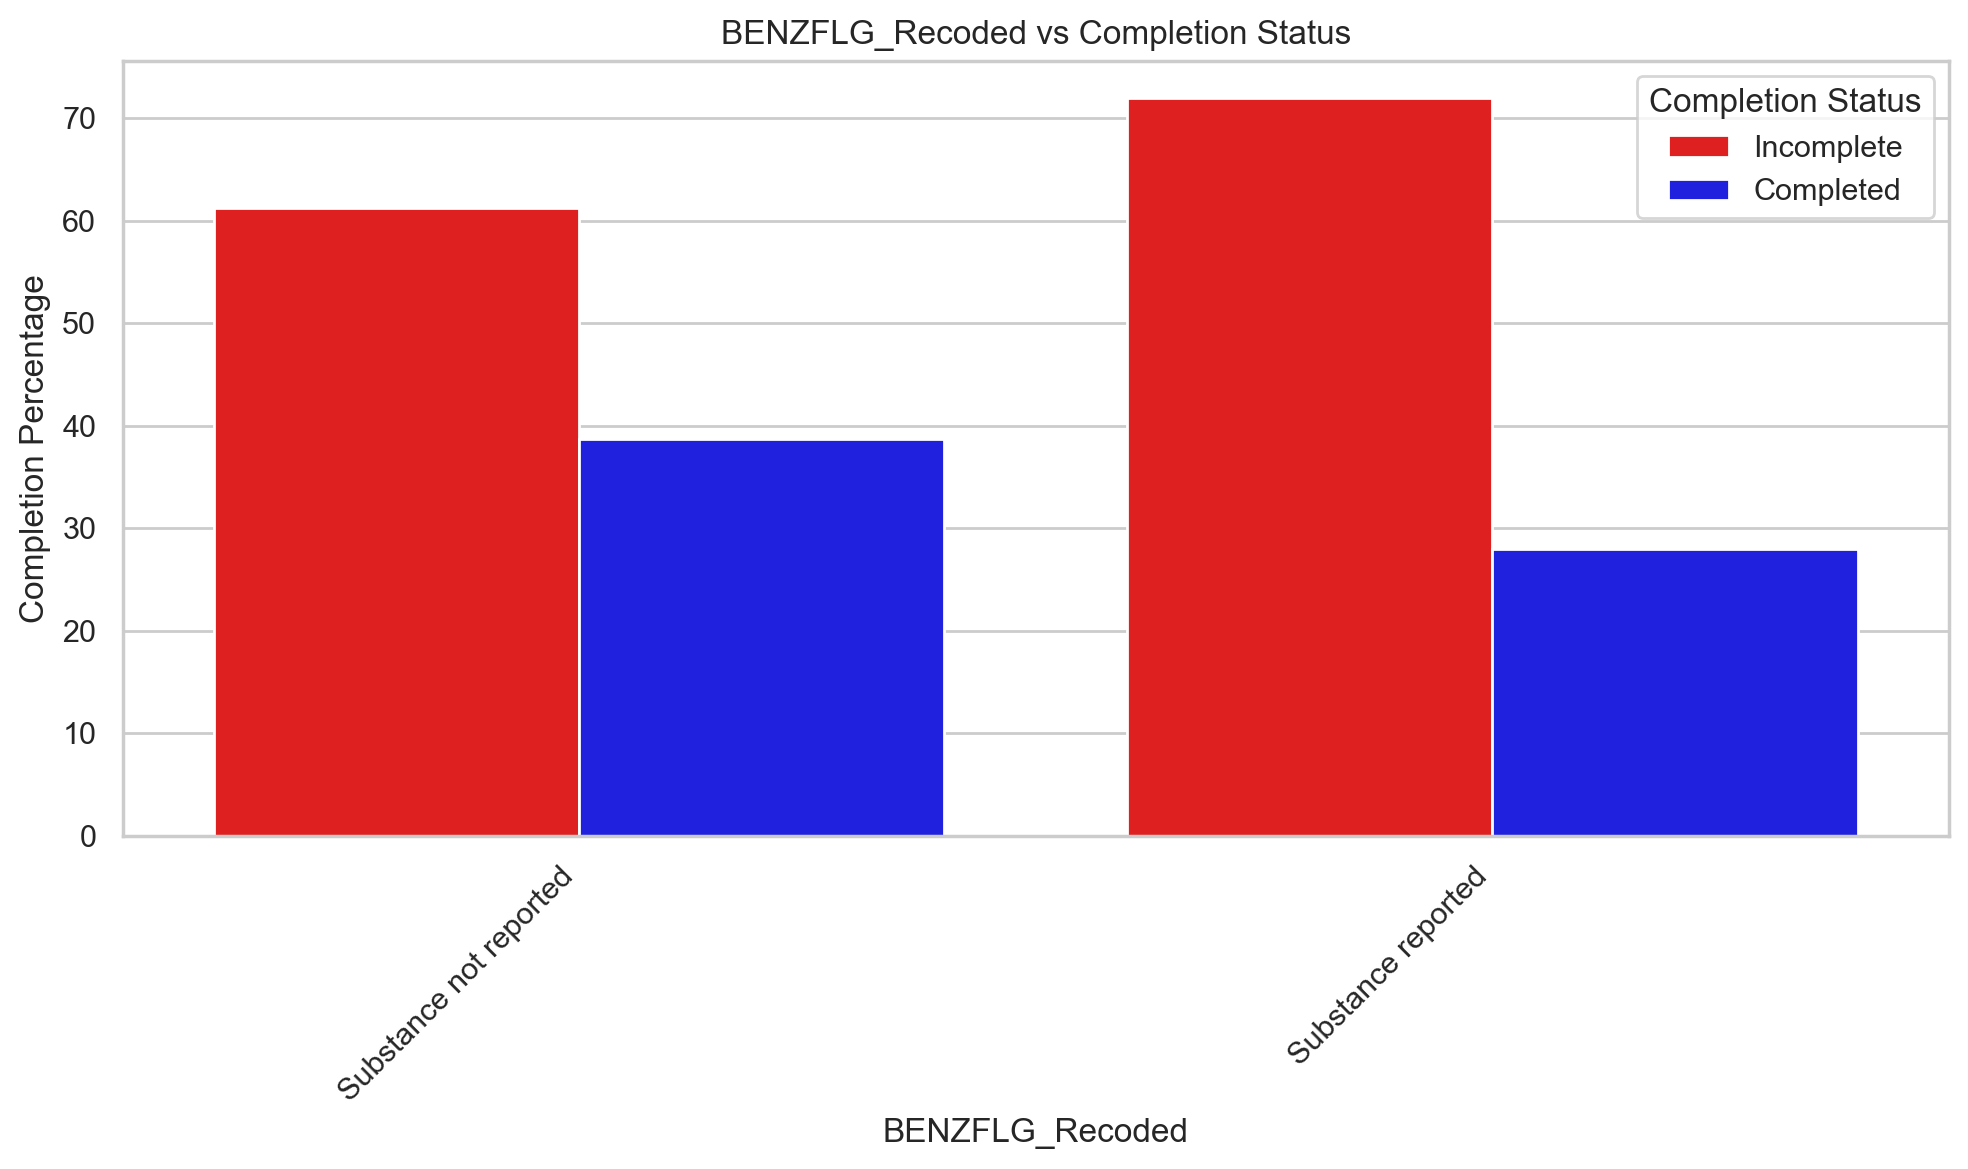

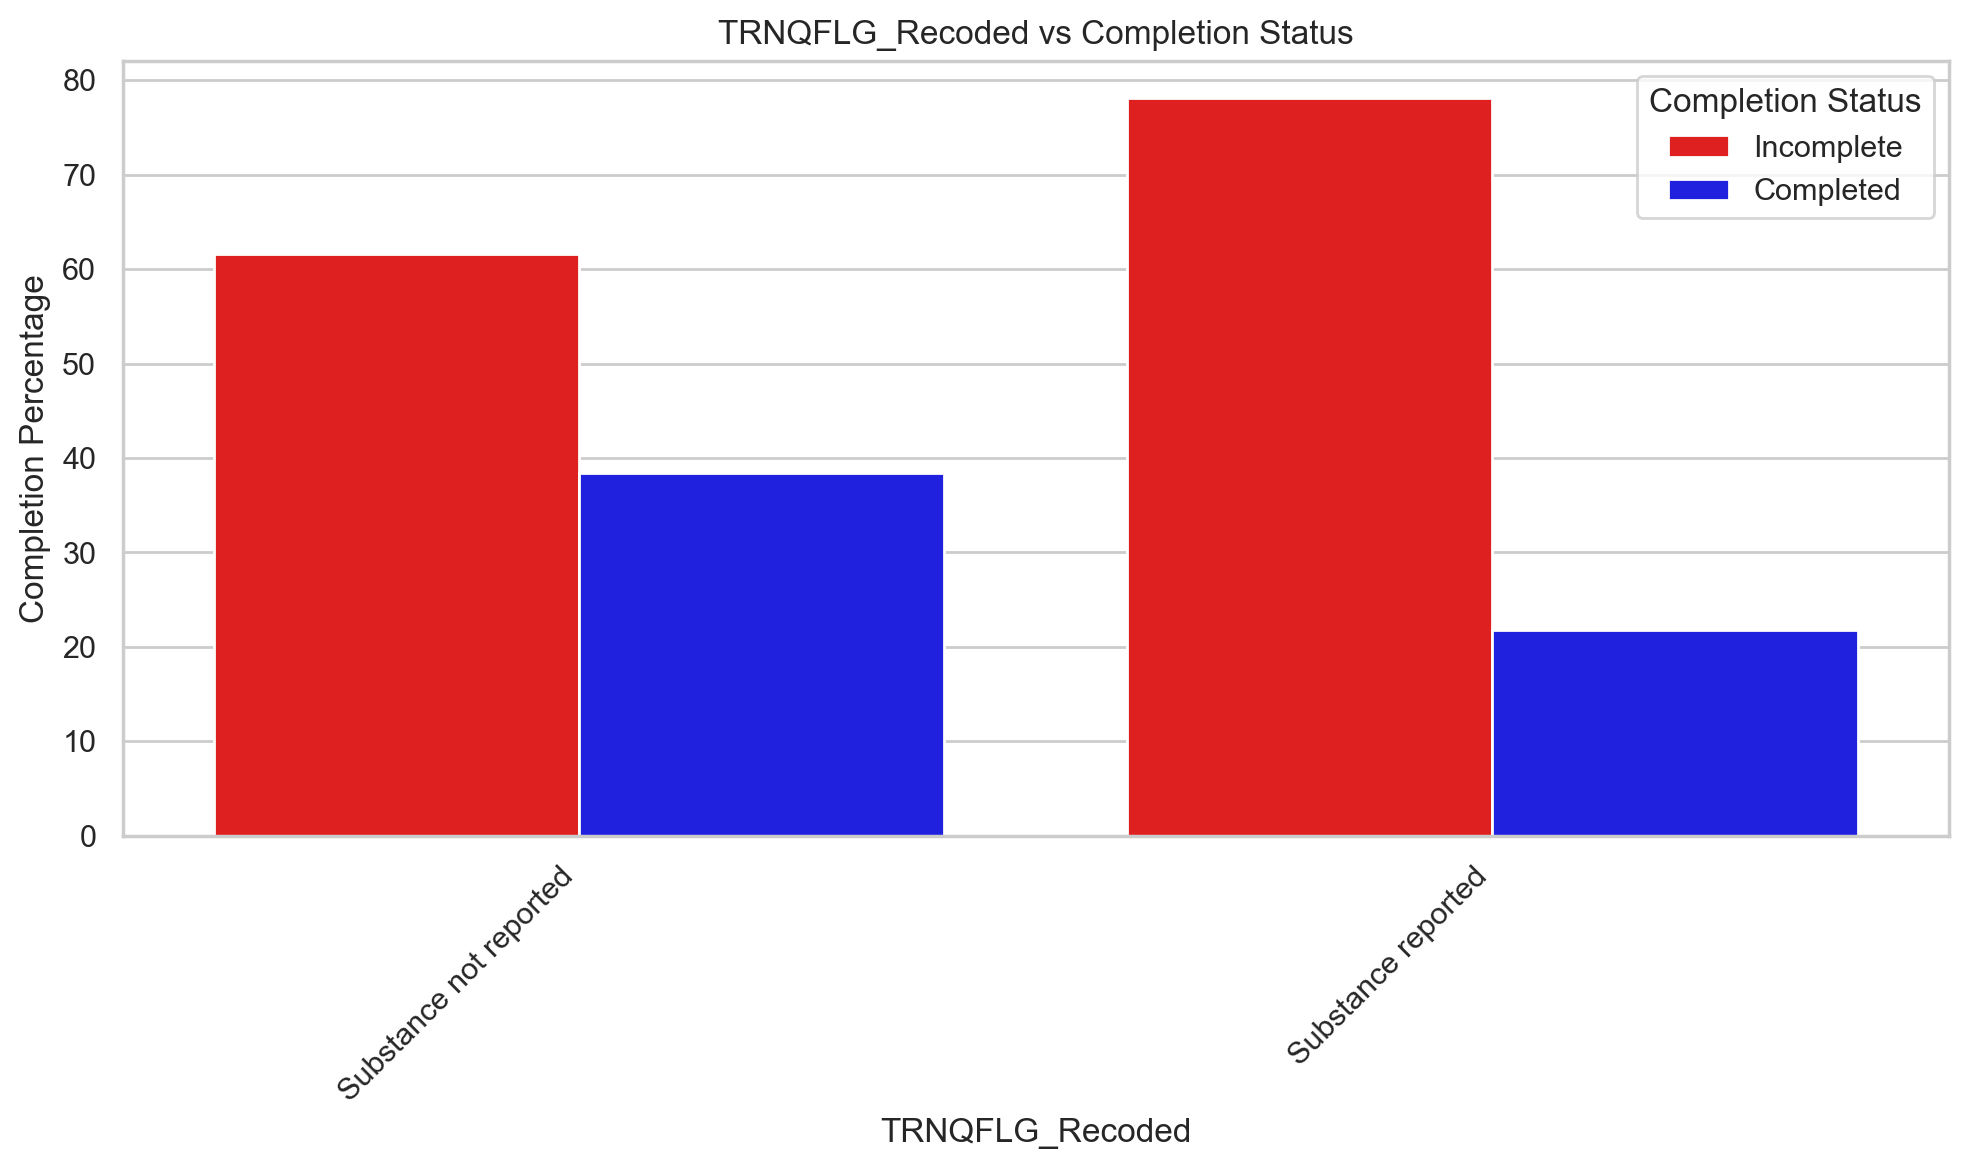

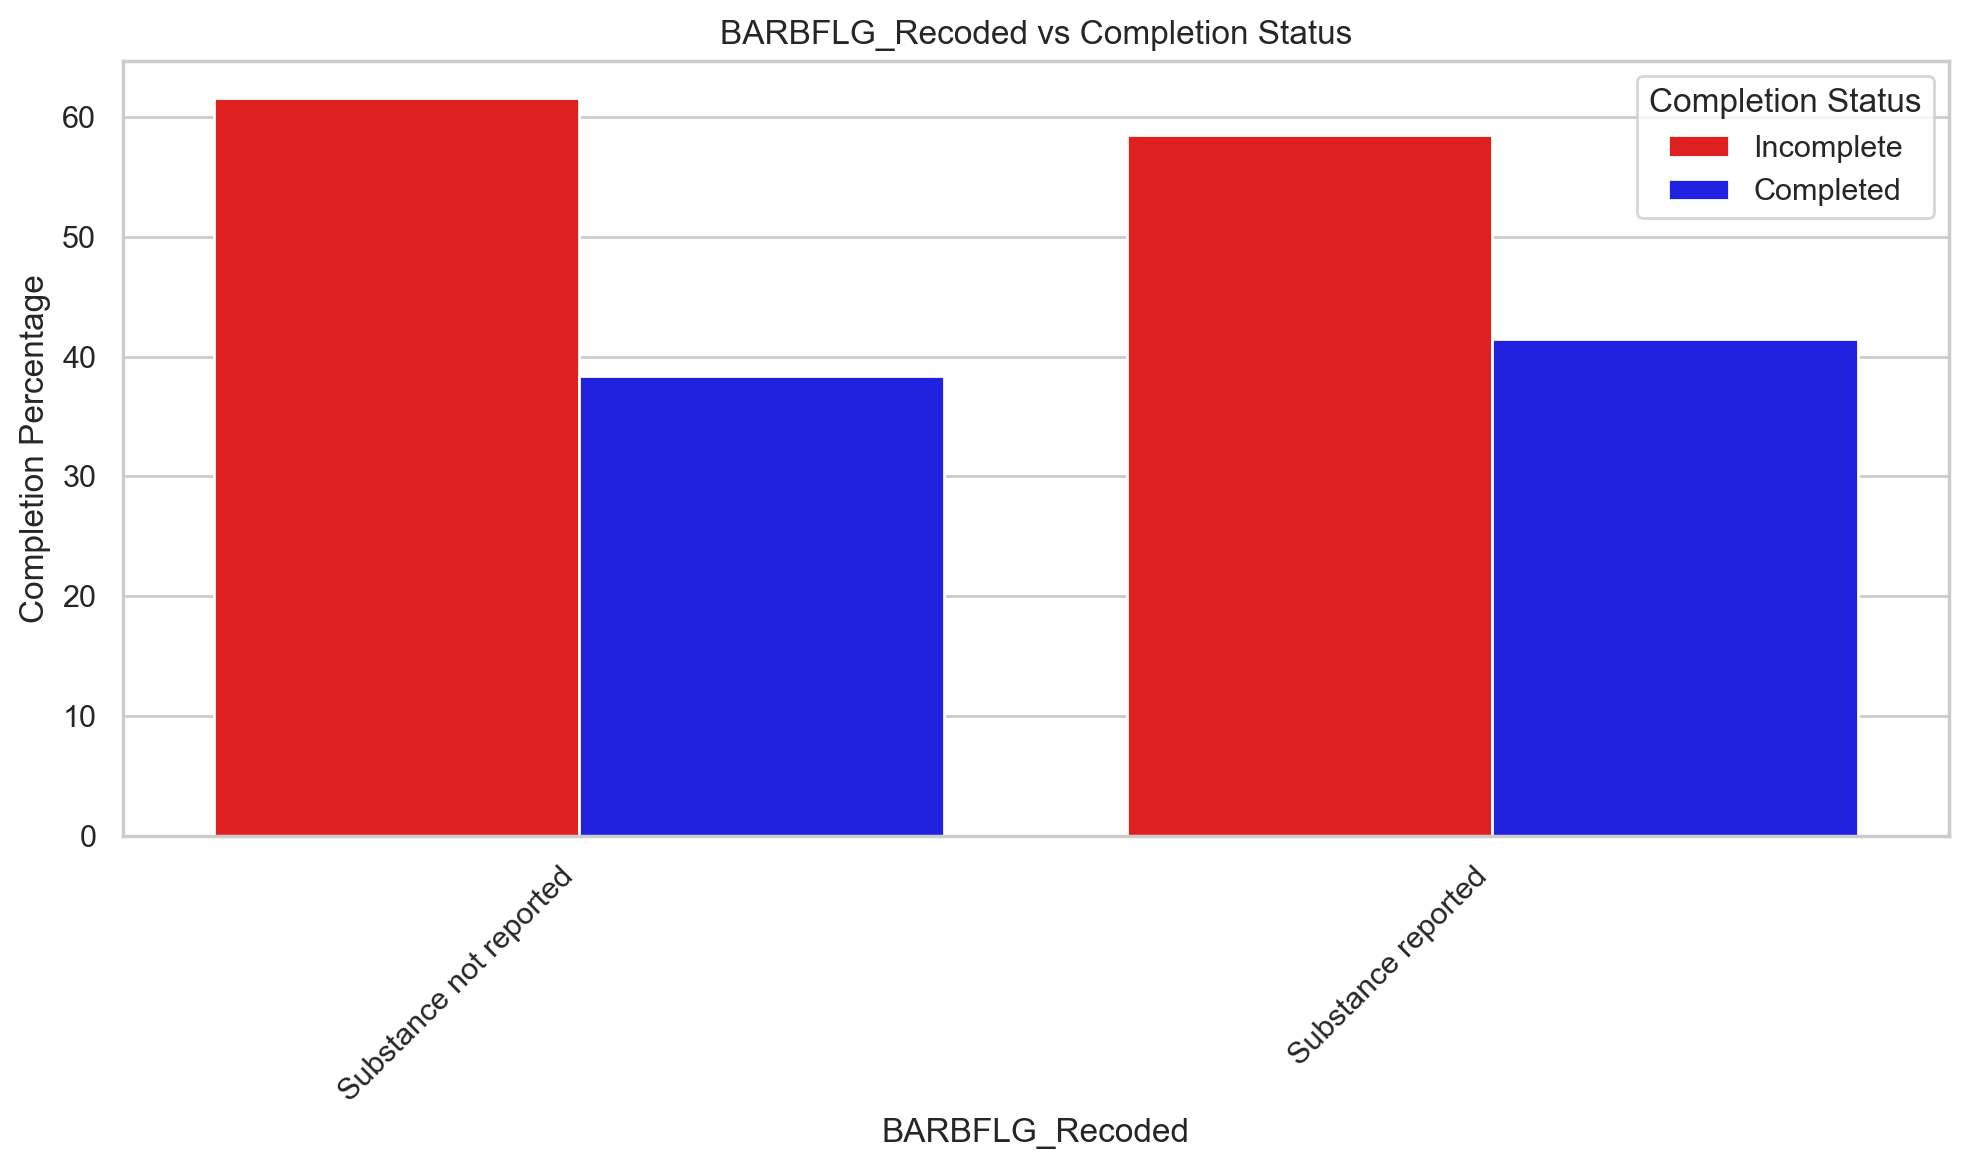

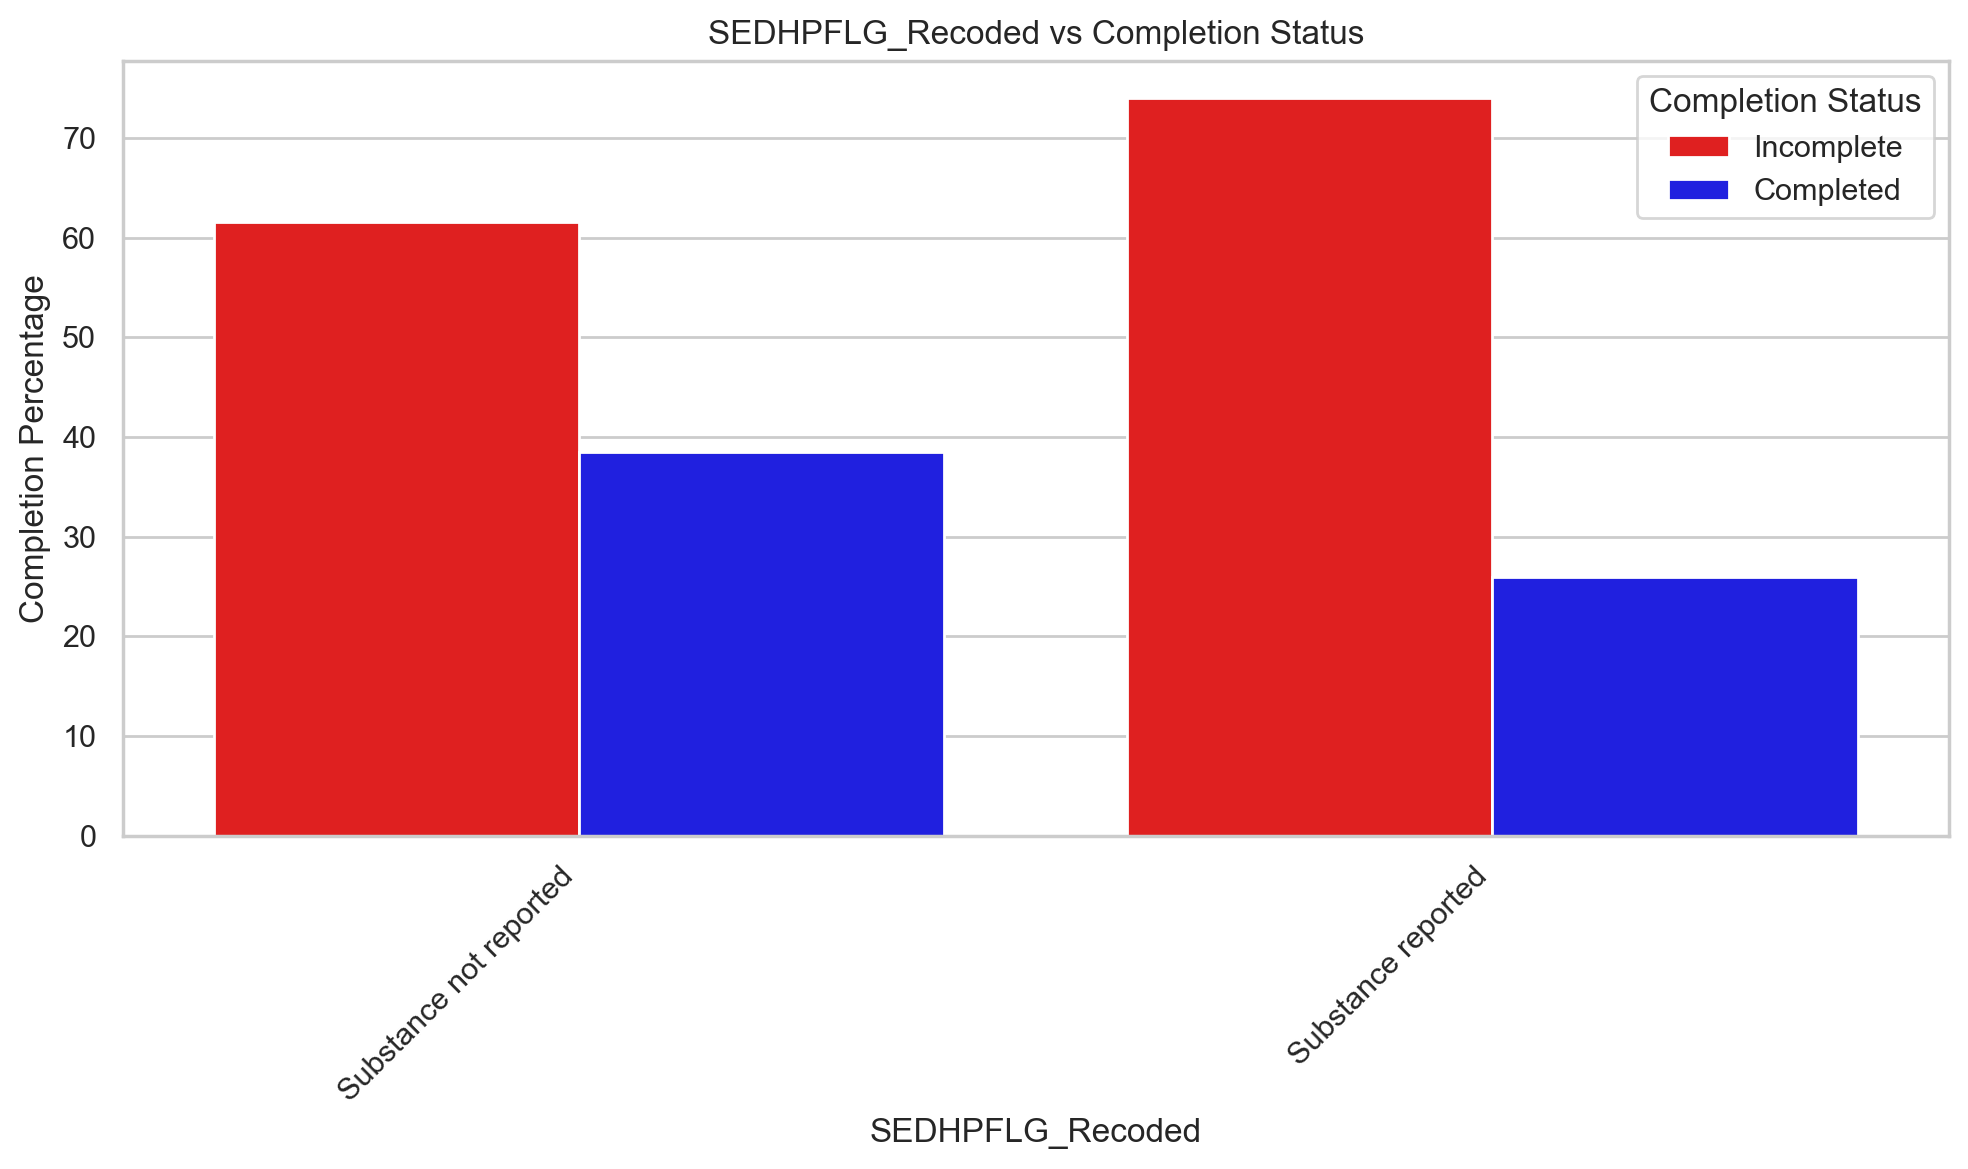

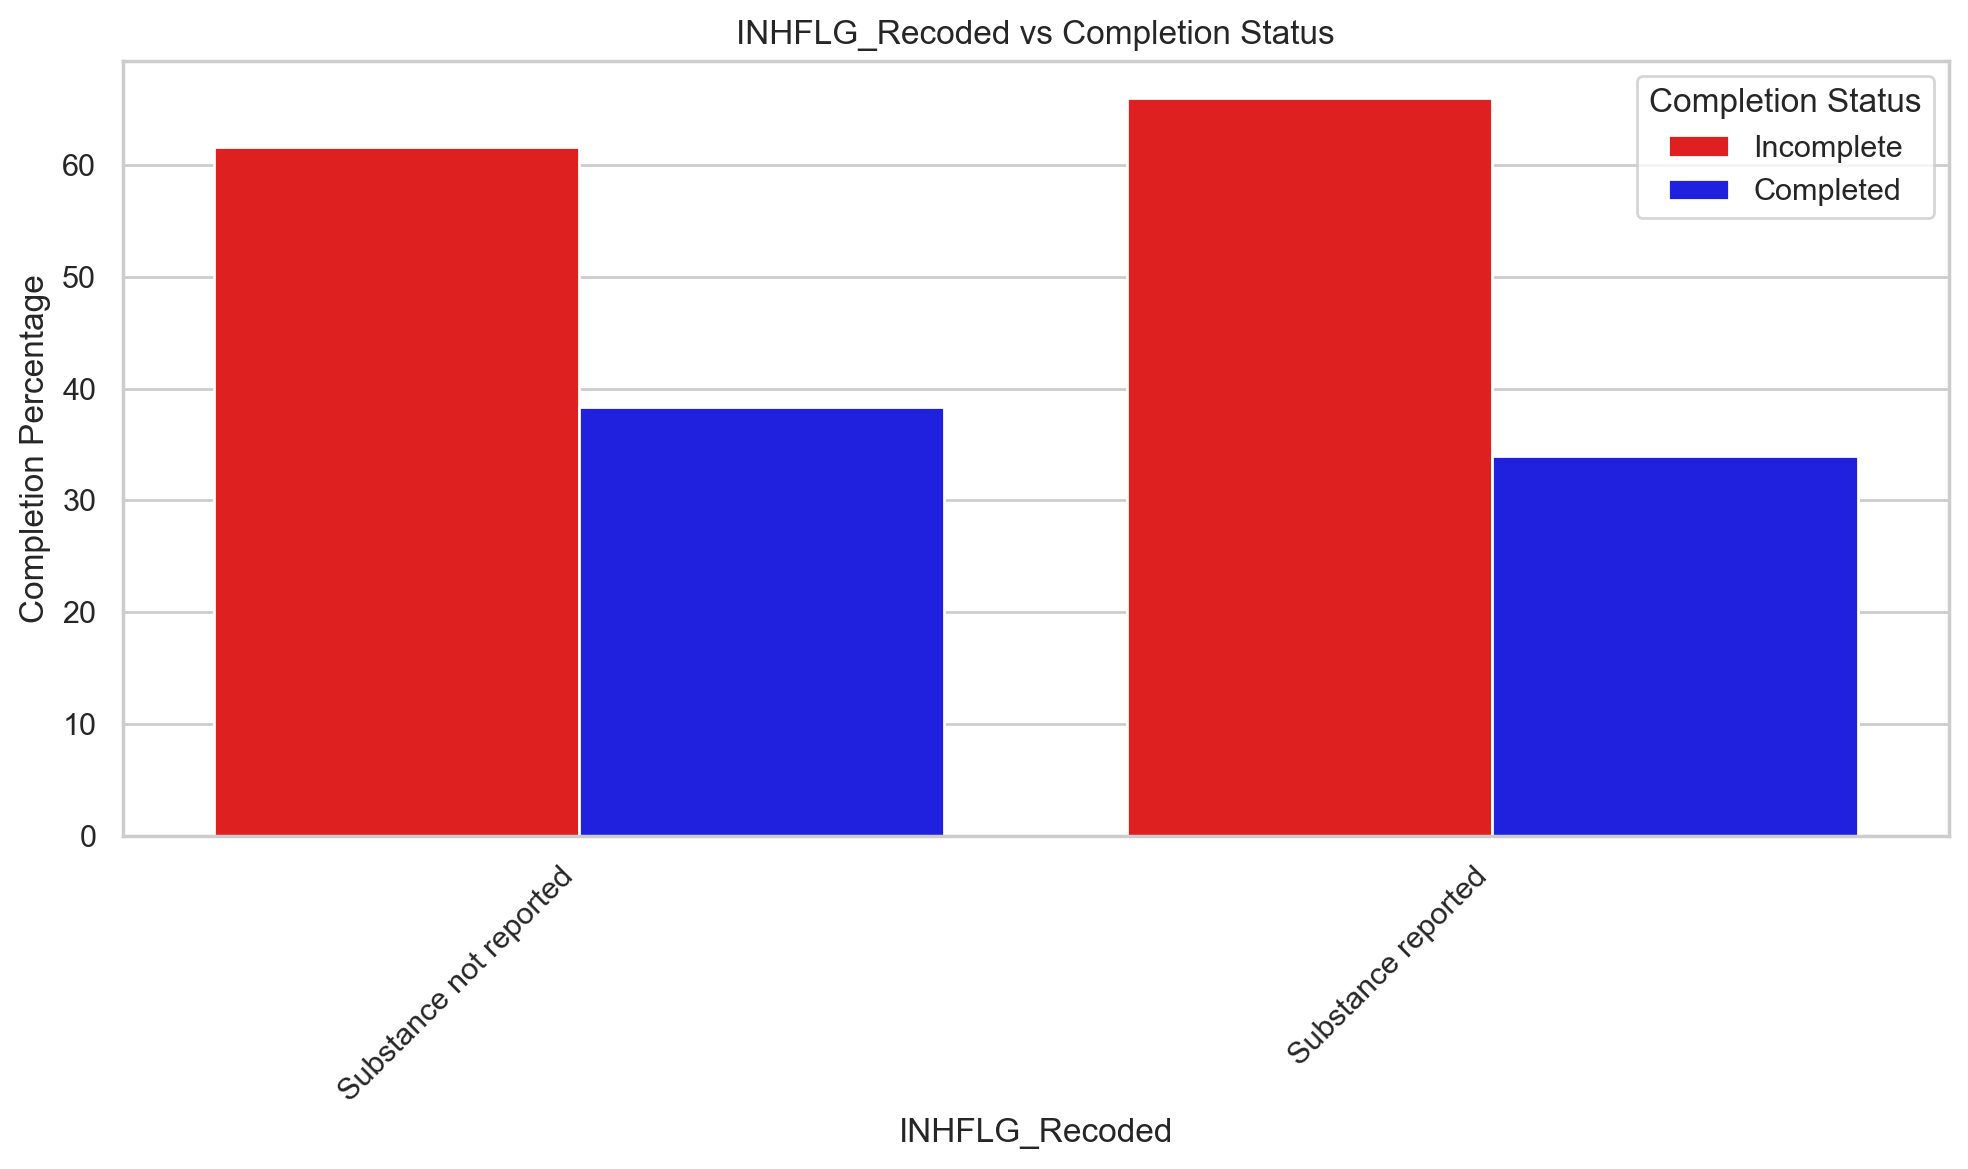

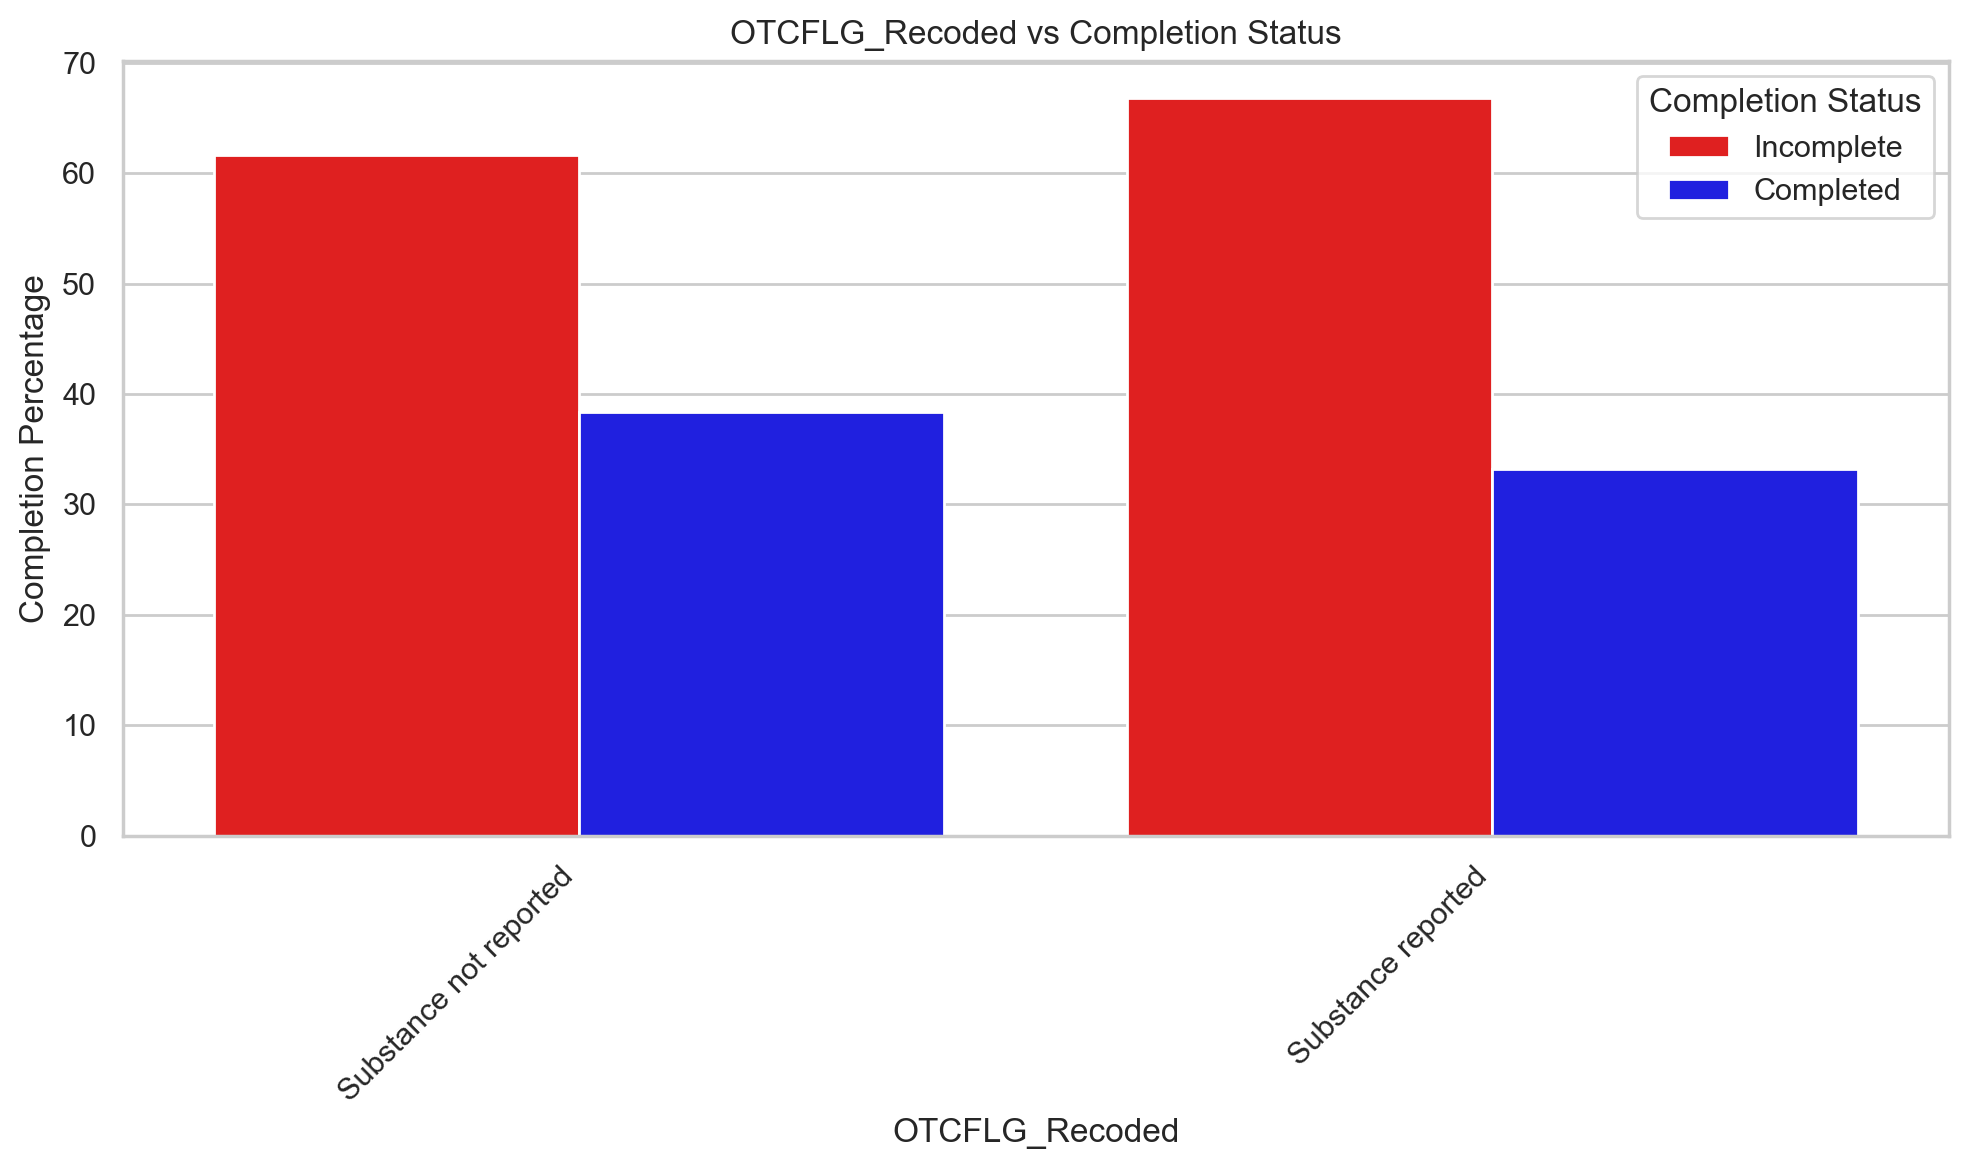

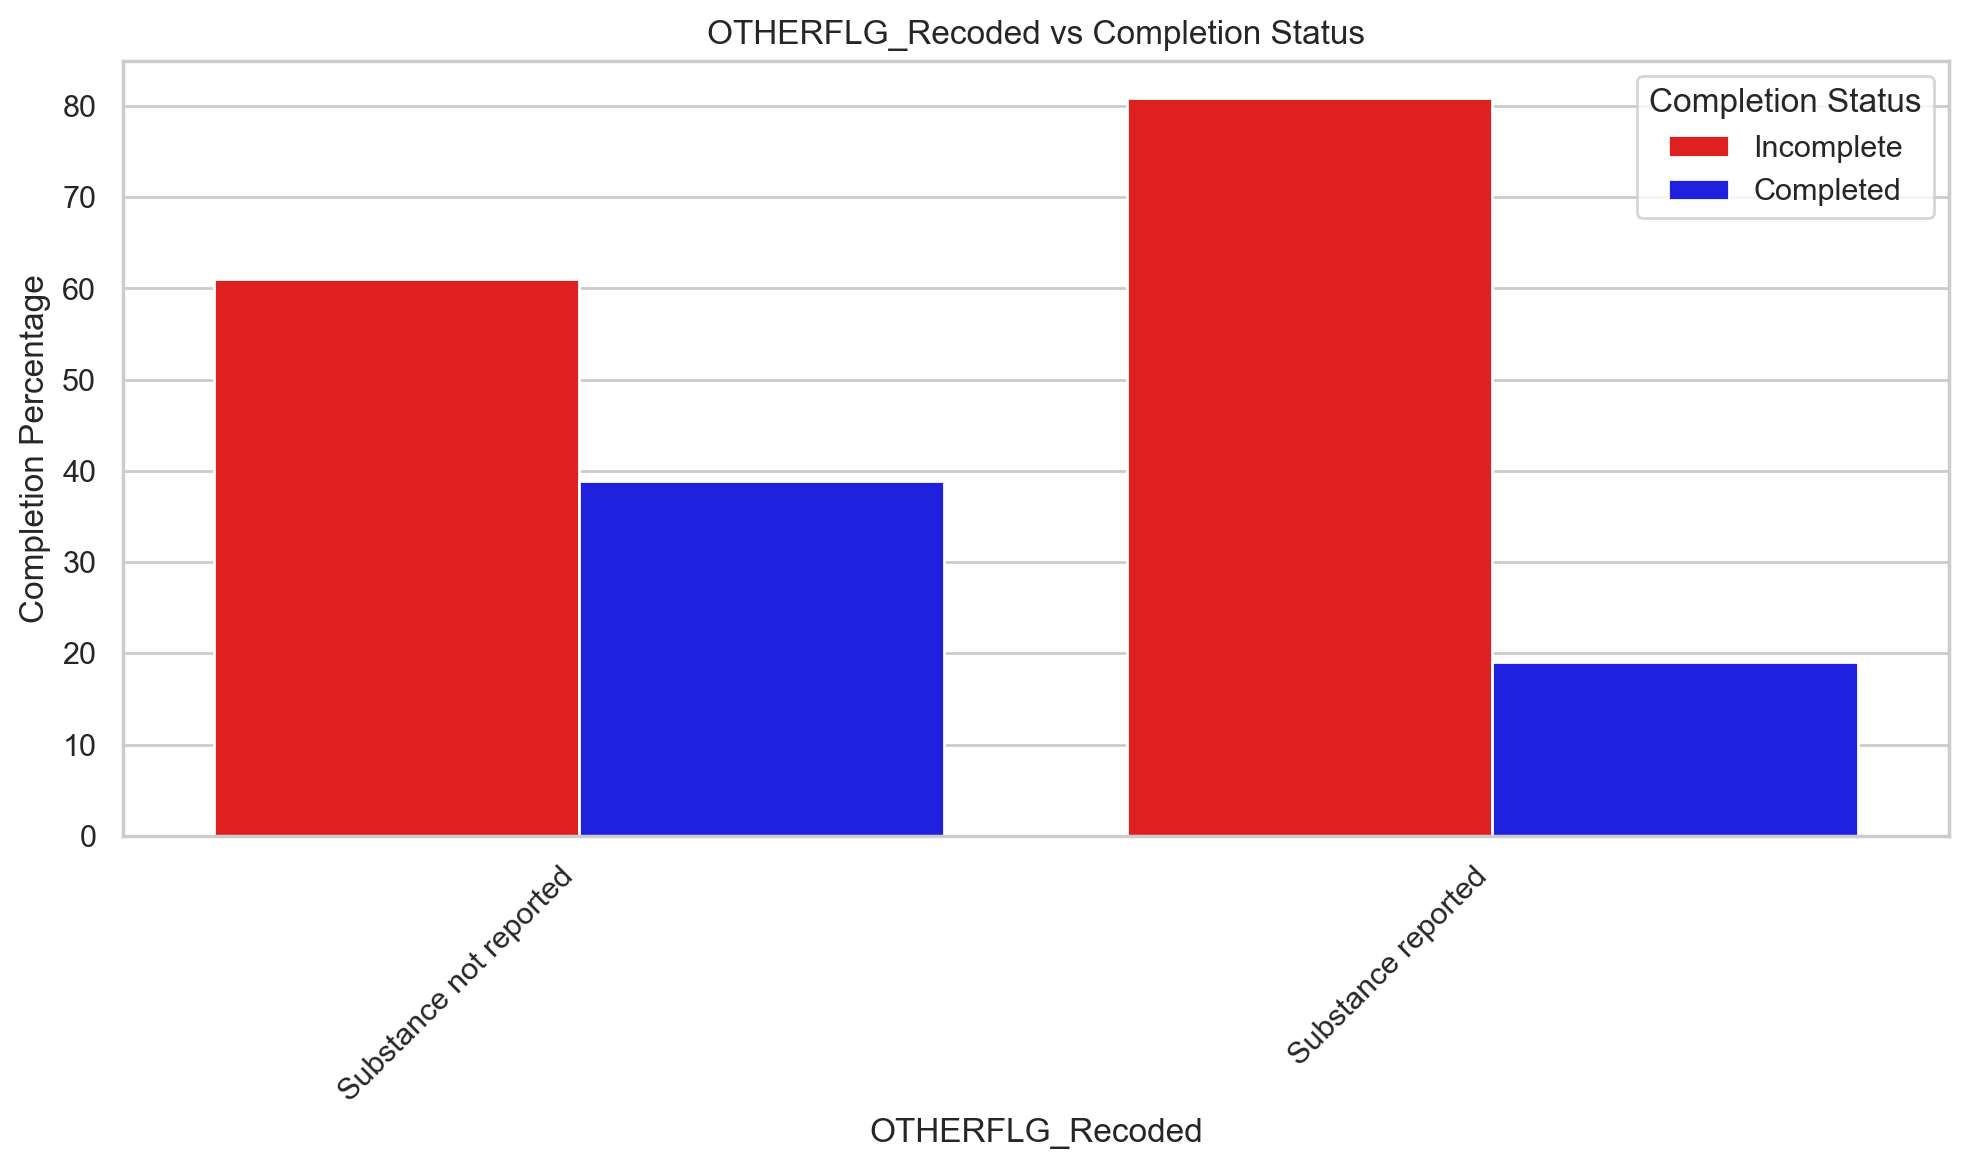

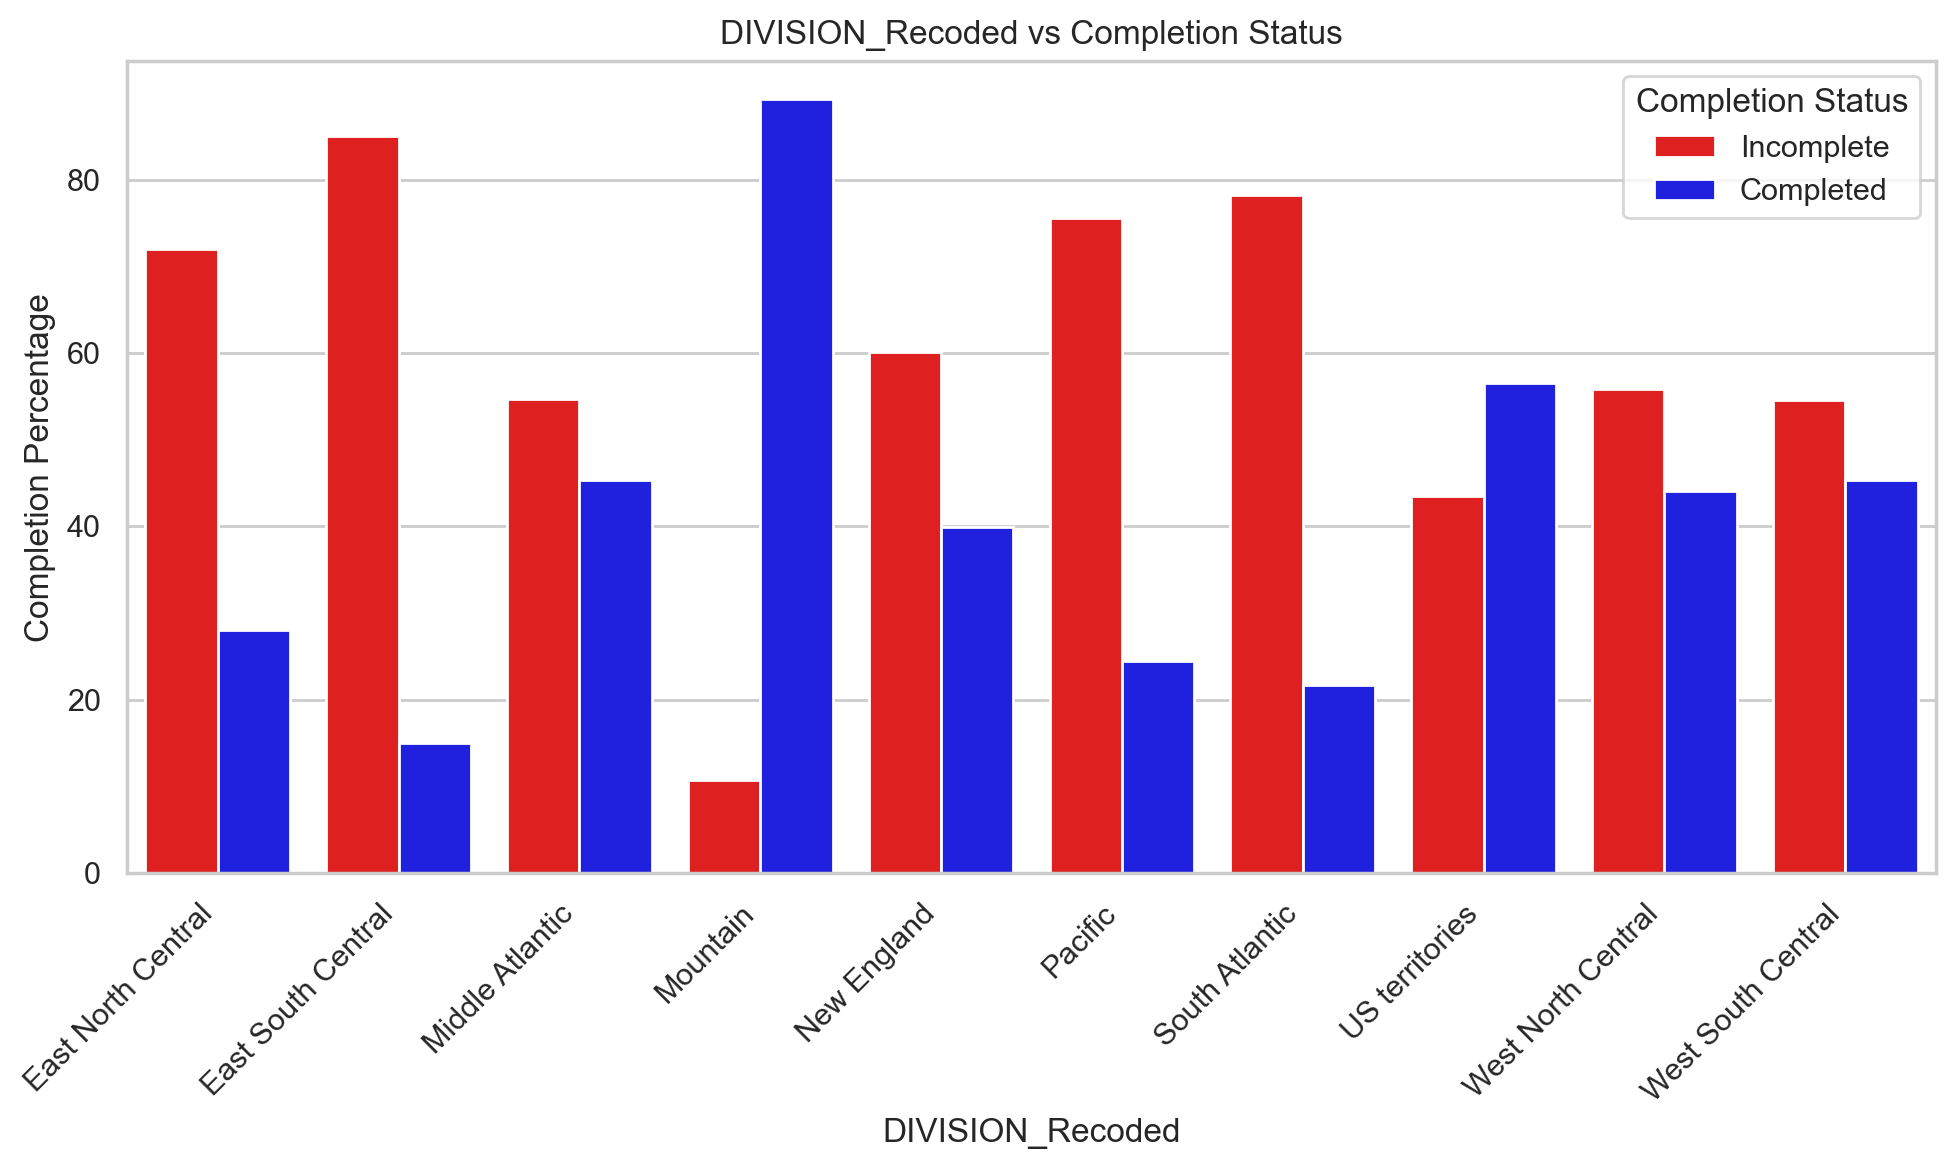

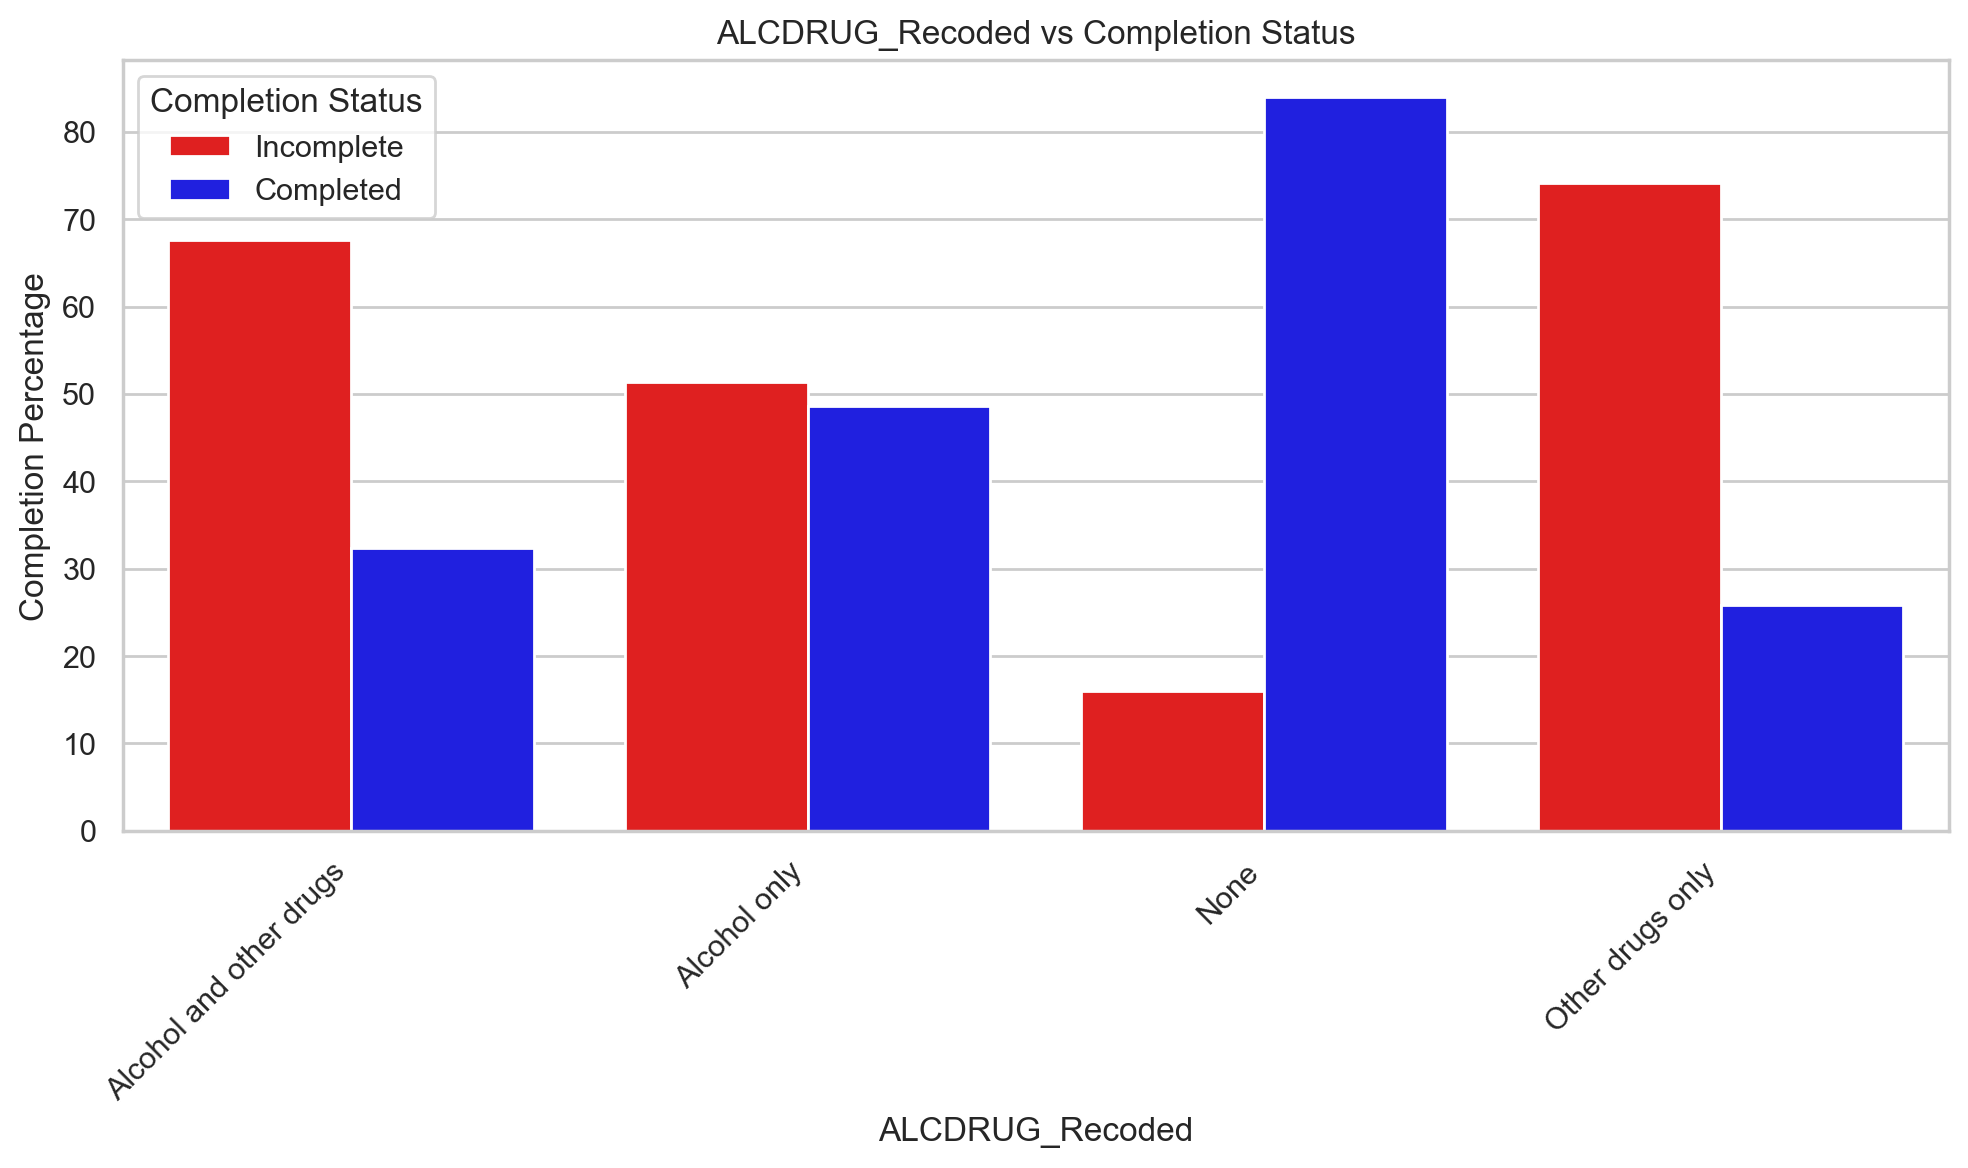

In [37]:
# Set the output size of plots within the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays

# Set up the plotting style
sns.set(style="whitegrid")

# Define a custom palette for completion status
custom_palette = {"Completed": "blue", "Incomplete": "red"}

# Loop through each recoded categorical variable and create a bar plot
for var in recoded_categorical_vars:
    plt.figure(figsize=(10, 6))  # Adjust the size as needed
    
    # Calculate completion percentages for each category of the variable
    completion_percentages = (
        teds_no_prior_state_pop_complete
        .groupby(var)['Completion_Status']
        .value_counts(normalize=True)
        .mul(100)
        .rename('Percentage')
        .reset_index()
    )
    
    # Create the bar plot with custom palette
    ax = sns.barplot(data=completion_percentages, x=var, y='Percentage', hue='Completion_Status', palette=custom_palette)
    plt.title(f'{var} vs Completion Status')
    plt.xlabel(f'{var}')
    plt.ylabel('Completion Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Completion Status')
    plt.tight_layout()
    plt.show()




Upon initial examination, it is evident that the completion rate of clients varies significantly depending on the type of treatment service or setting they are placed in during admission or transfer. Notably, Detox and 24-hour free-standing residential services exhibit the highest completion rates. This pattern is anticipated, given the swift transitions often observed in these settings. Given the objectives of this project, focusing on outpatient services seems prudent. This decision is based on the recognition that treatment completion/success criteria and durations differ considerably between outpatient services and other service types like 24-hour inpatient and detoxification.

A closer analysis of treatment completion rates among clients who reported alcohol use upon admission versus those who did not reveals minimal variance. However, distinct differences emerge when considering cocaine or crack use. Cocaine users demonstrate a lower completion rate compared to non-users. In contrast, those who reported marijuana use exhibit higher completion rates than non-users. Similarly, individuals reporting heroin use also exhibit elevated completion rates. In summary, completion rates exhibit variability depending on the reported drug use during admissions.

This observation underscores the potential influence of reported drug use on treatment completion rates, hinting at the need for further exploration to understand the nuanced relationships between drug use patterns and treatment outcomes.

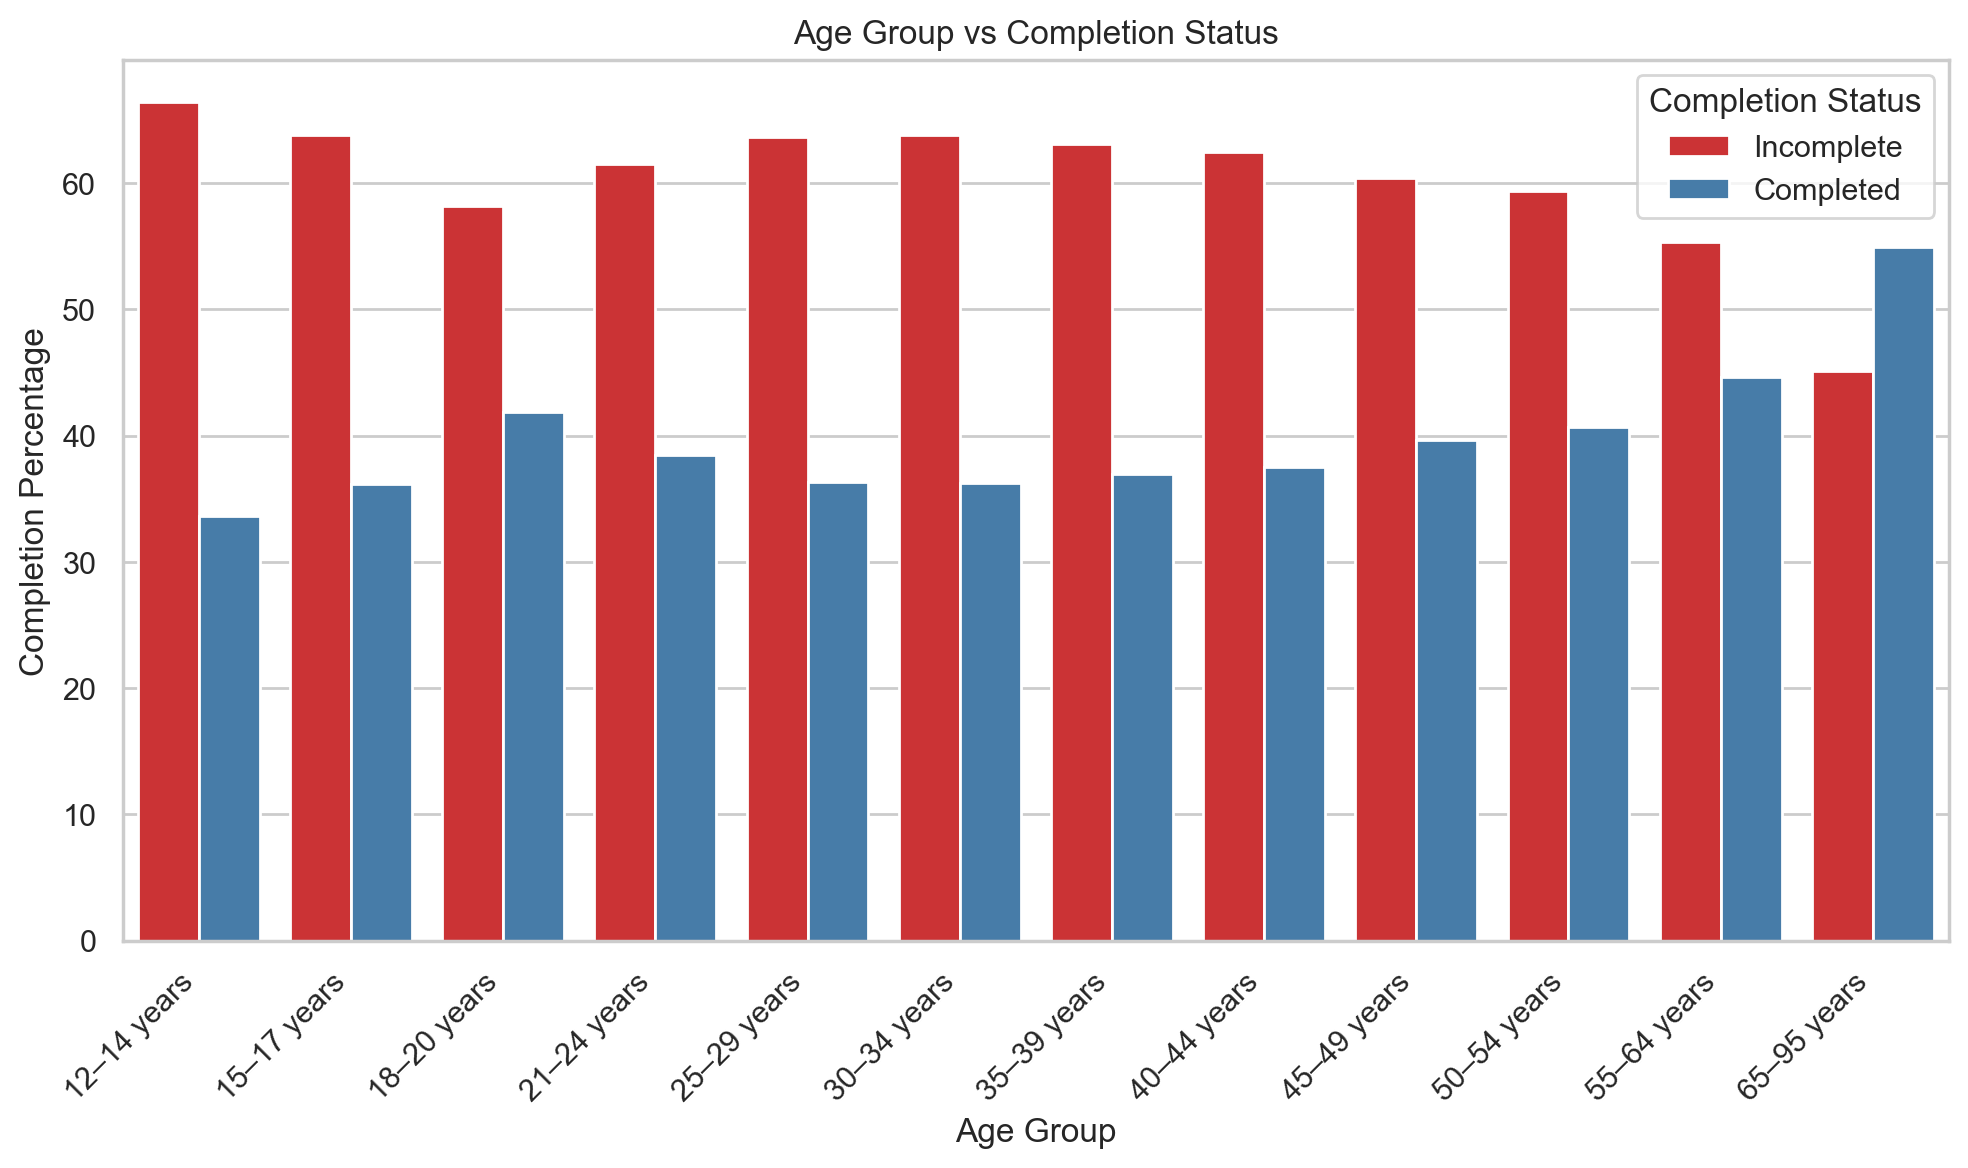

In [41]:
# Set the output size of plots within the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays

# Set up the plotting style
sns.set(style="whitegrid")

# Calculate completion percentages for each service category
completion_percentages = (
    teds_no_prior_state_pop_complete
    .groupby('Age_Group')['Completion_Status']
    .value_counts(normalize=True)
    .mul(100)
    .rename('Percentage')
    .reset_index()
)

# Plot the percentages using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=completion_percentages, x='Age_Group', y='Percentage', hue='Completion_Status', palette='Set1')
plt.title('Age Group vs Completion Status')
plt.xlabel('Age Group')
plt.ylabel('Completion Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Completion Status')
plt.tight_layout()
plt.show()


The trend in completion rates reveals an improvement beyond the age of 44, whereas the age group of 12-14 years old displays the lowest completion rate.

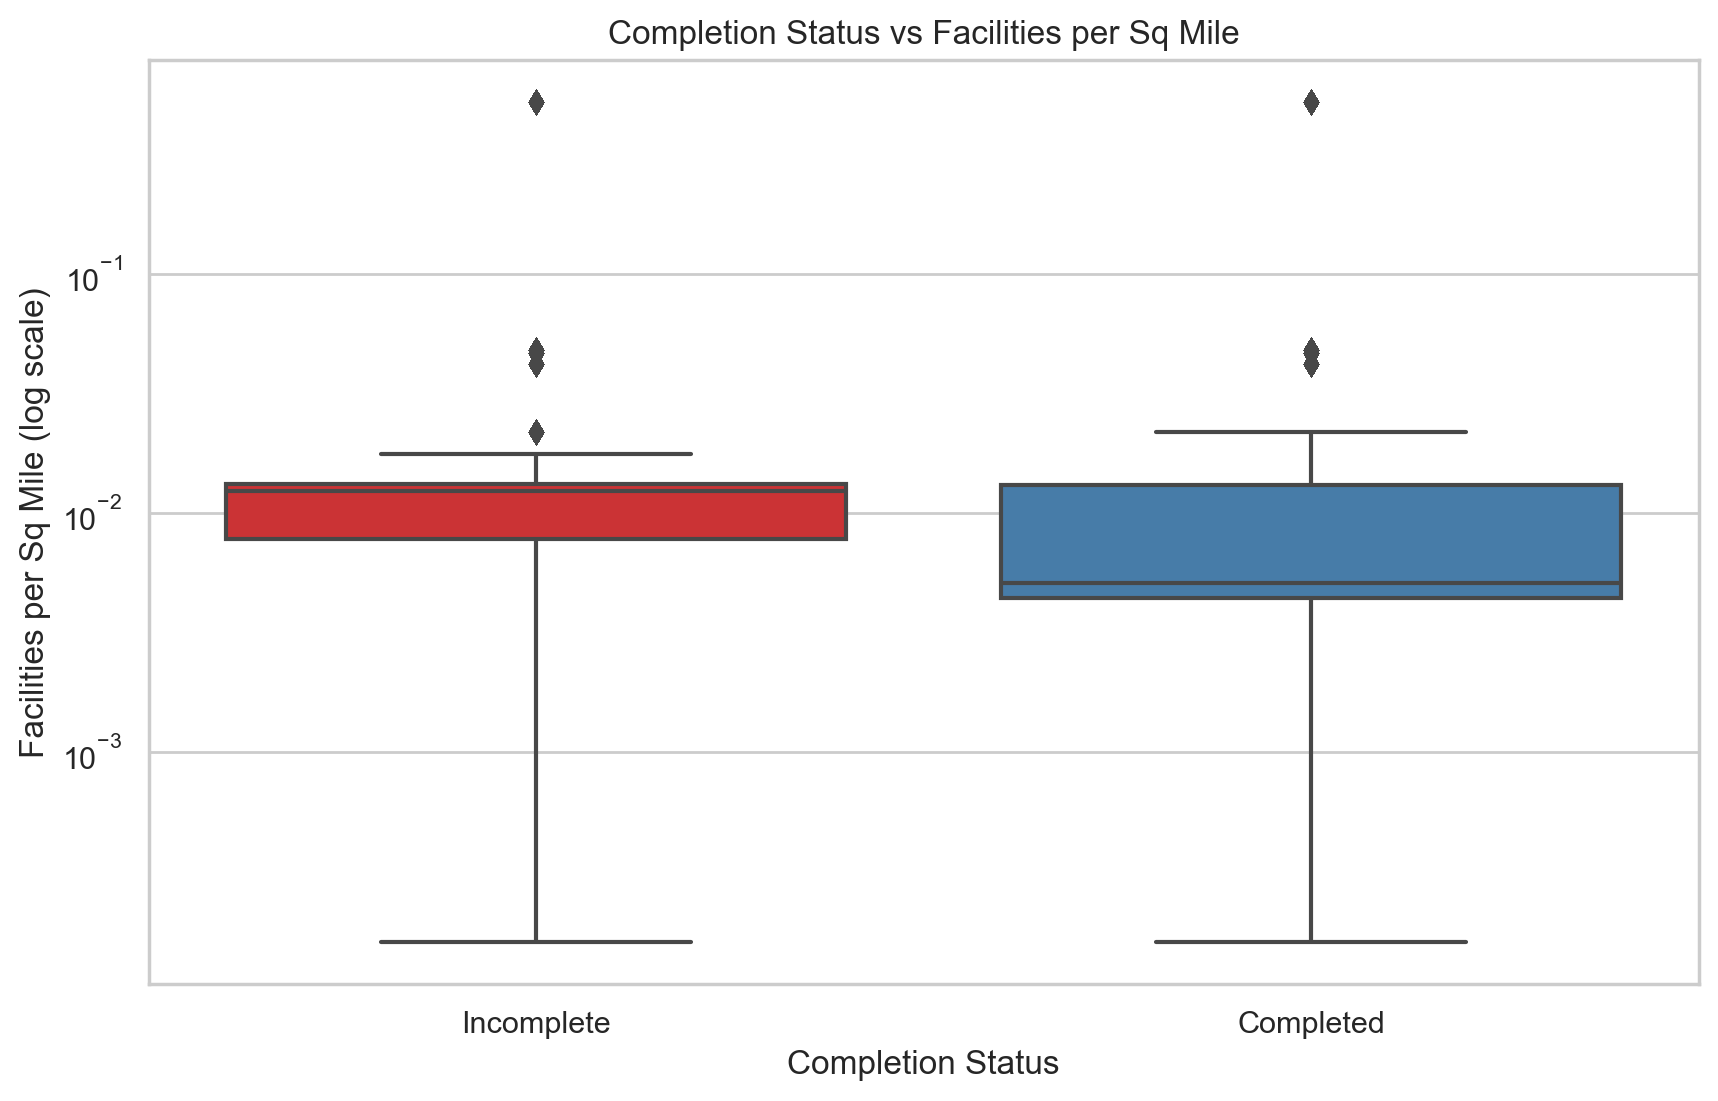

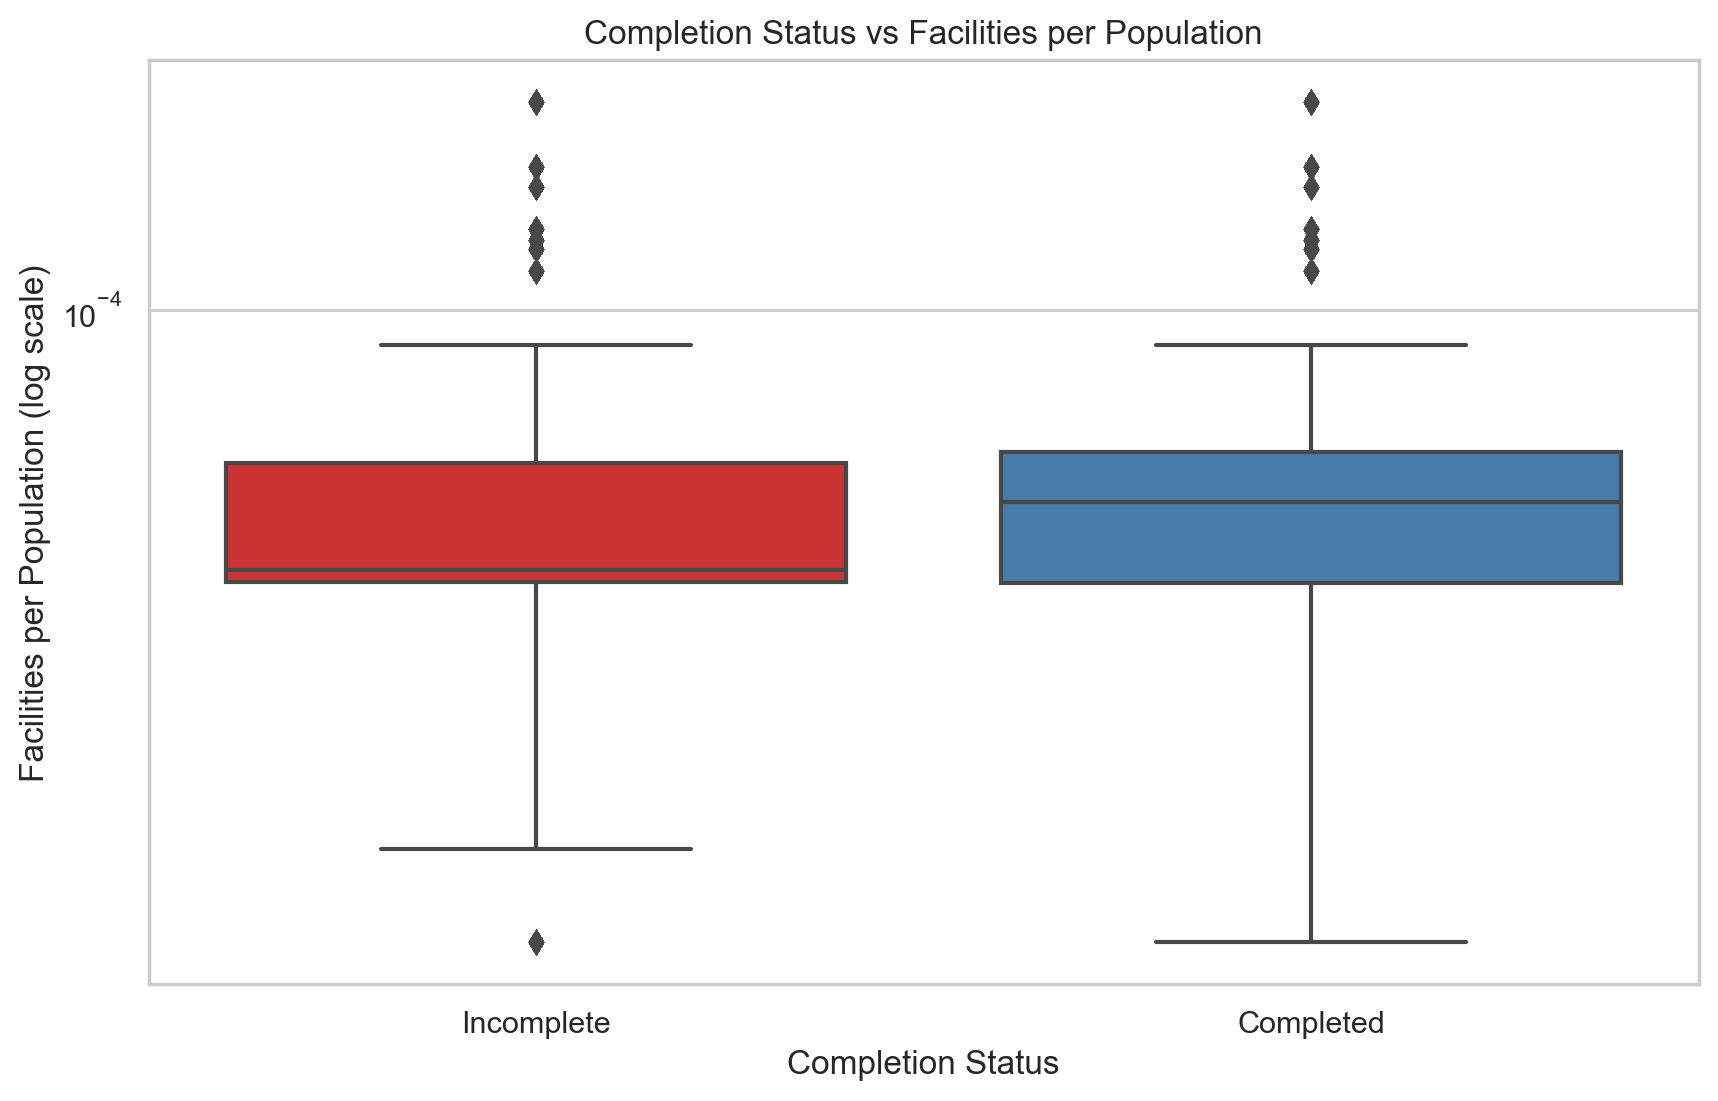

In [52]:
    # Plot the relationship between facilities per square mile and completion status
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=teds_no_prior_state_pop_complete, x='Completion_Status', y='Facilities_Per_Sq_Mile', palette='Set1')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Completion Status vs Facilities per Sq Mile')
    plt.xlabel('Completion Status')
    plt.ylabel('Facilities per Sq Mile (log scale)')
    plt.show()

    # Plot the relationship between facilities per population and completion status
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=teds_no_prior_state_pop_complete, x='Completion_Status', y='Facilities_Per_Population', palette='Set1')
    plt.yscale('log')  # Set y-axis to log scale
    plt.title('Completion Status vs Facilities per Population')
    plt.xlabel('Completion Status')
    plt.ylabel('Facilities per Population (log scale)')
    plt.show()


Overall, the boxplot suggests that there might be a difference in the distribution of treatment facilities per area between completed and incomplete cases. The boxplots indicate that higher facilities per square mile appears to be associated with higher treatment completion rates as expected. 

This finding could point towards potential challenges or limitations in terms of treatment facility distribution and accessibility in more densely populated or geographically constrained states.

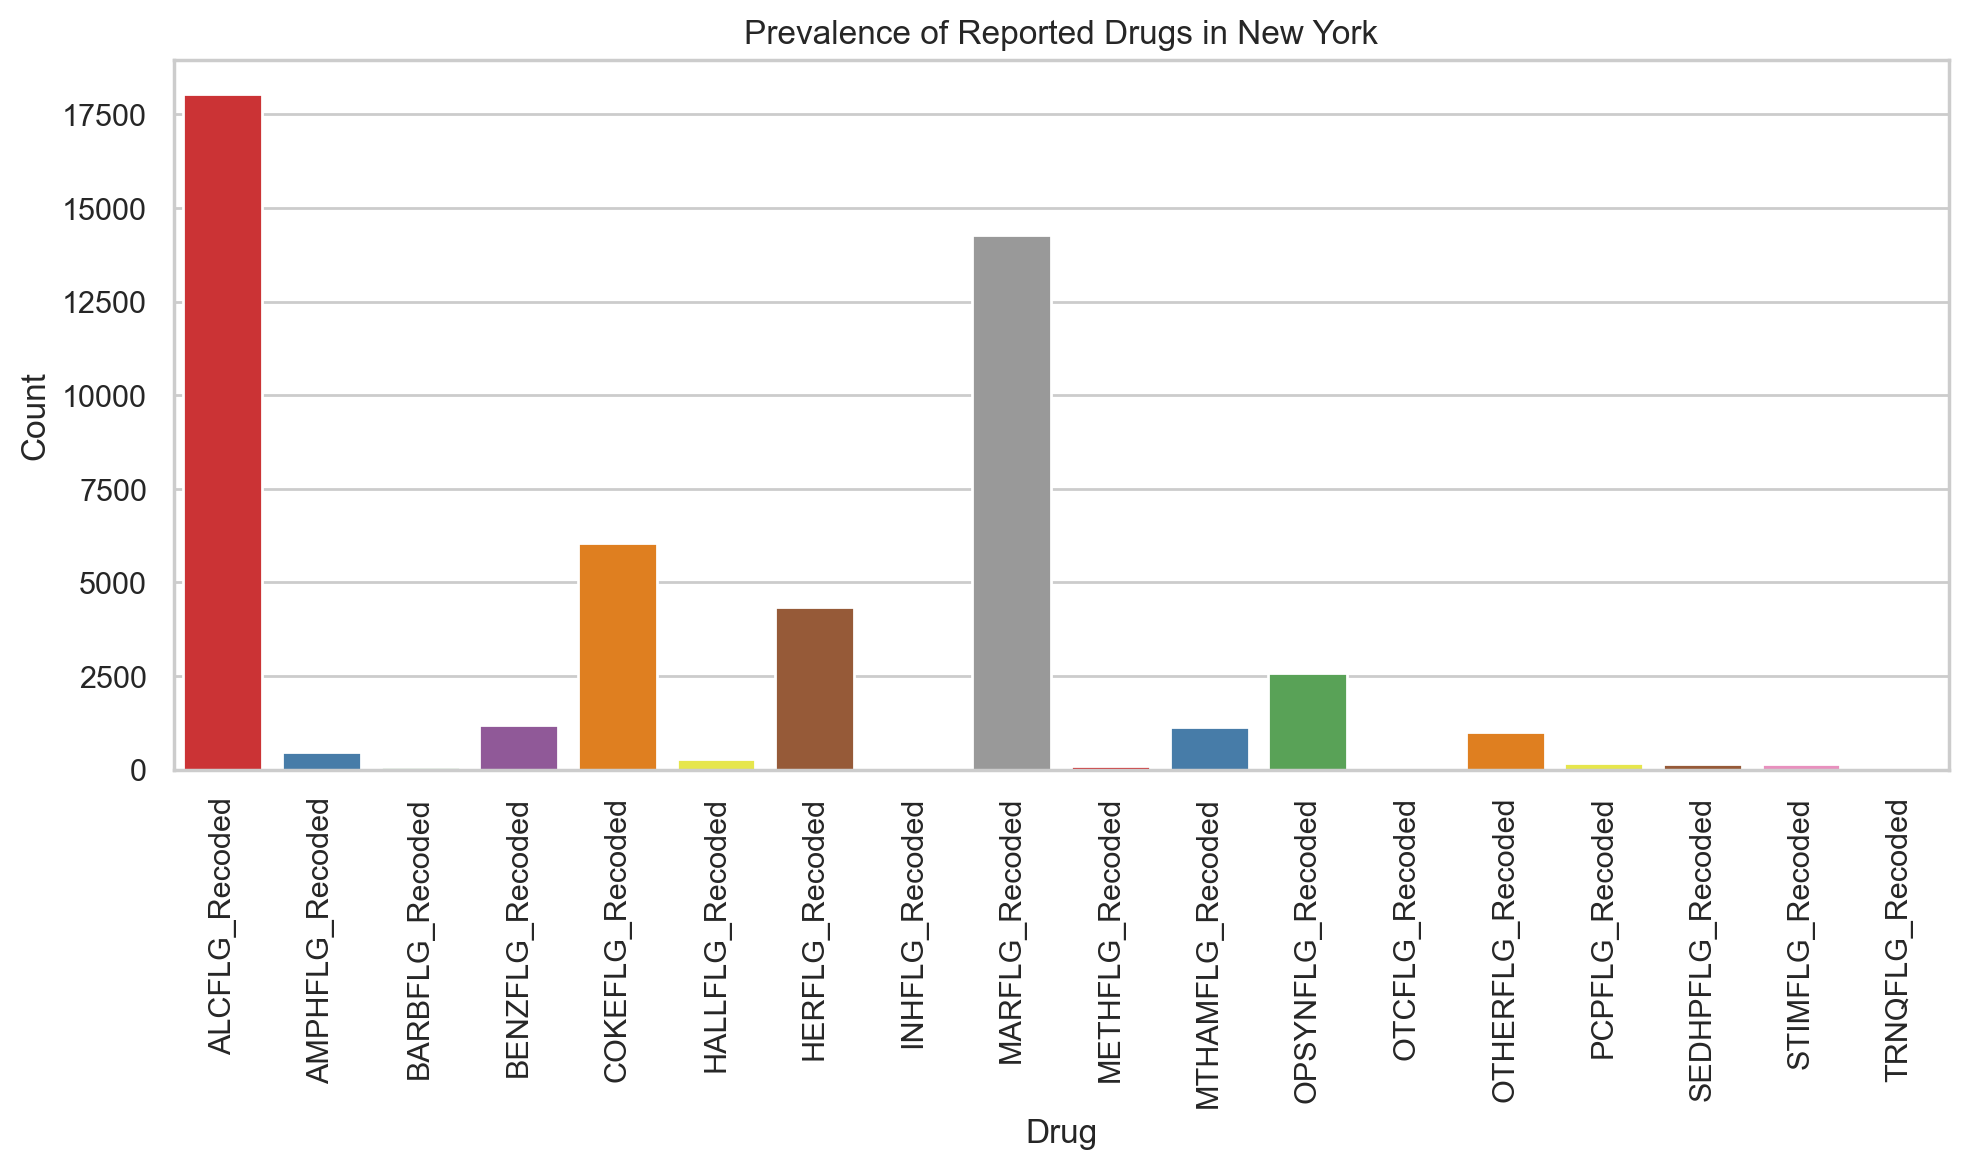

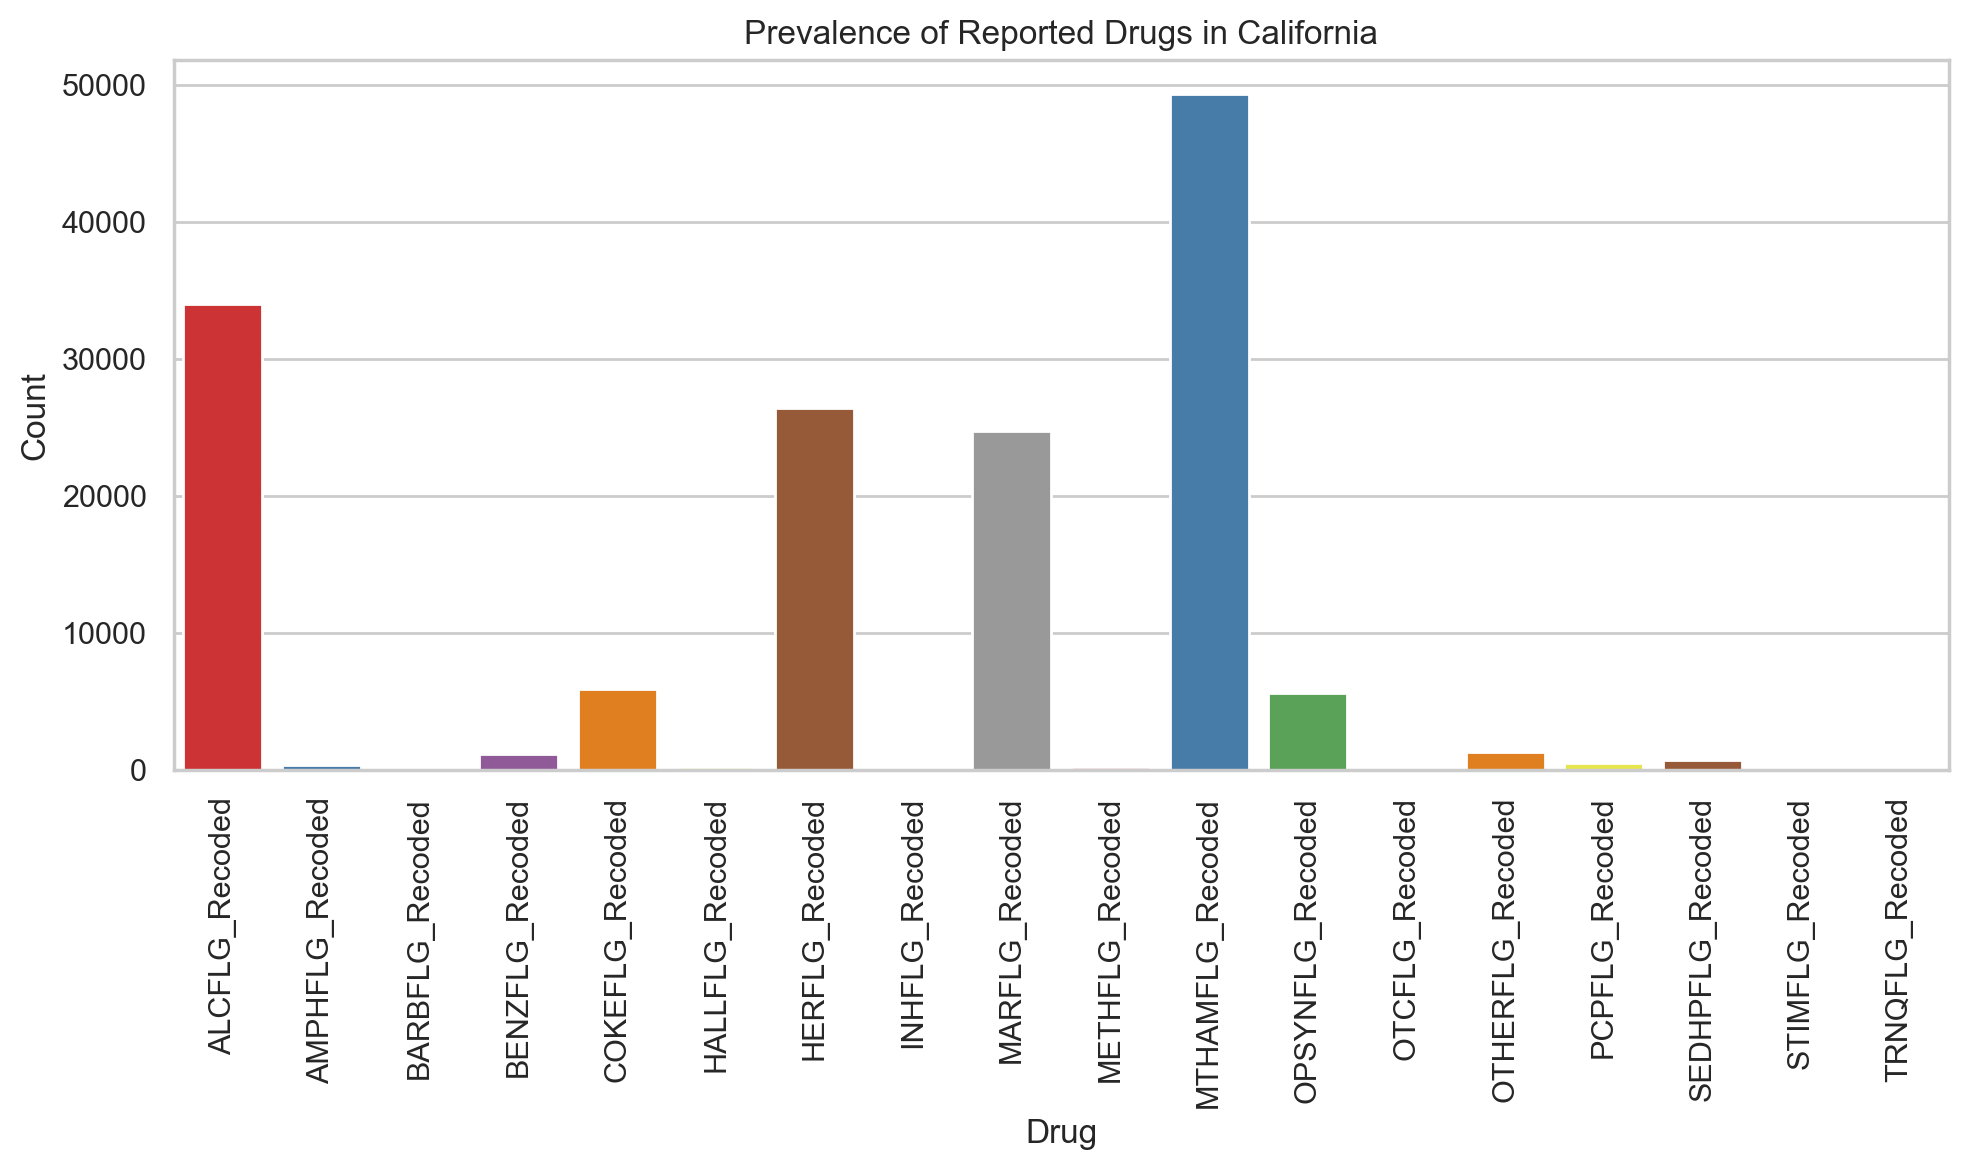

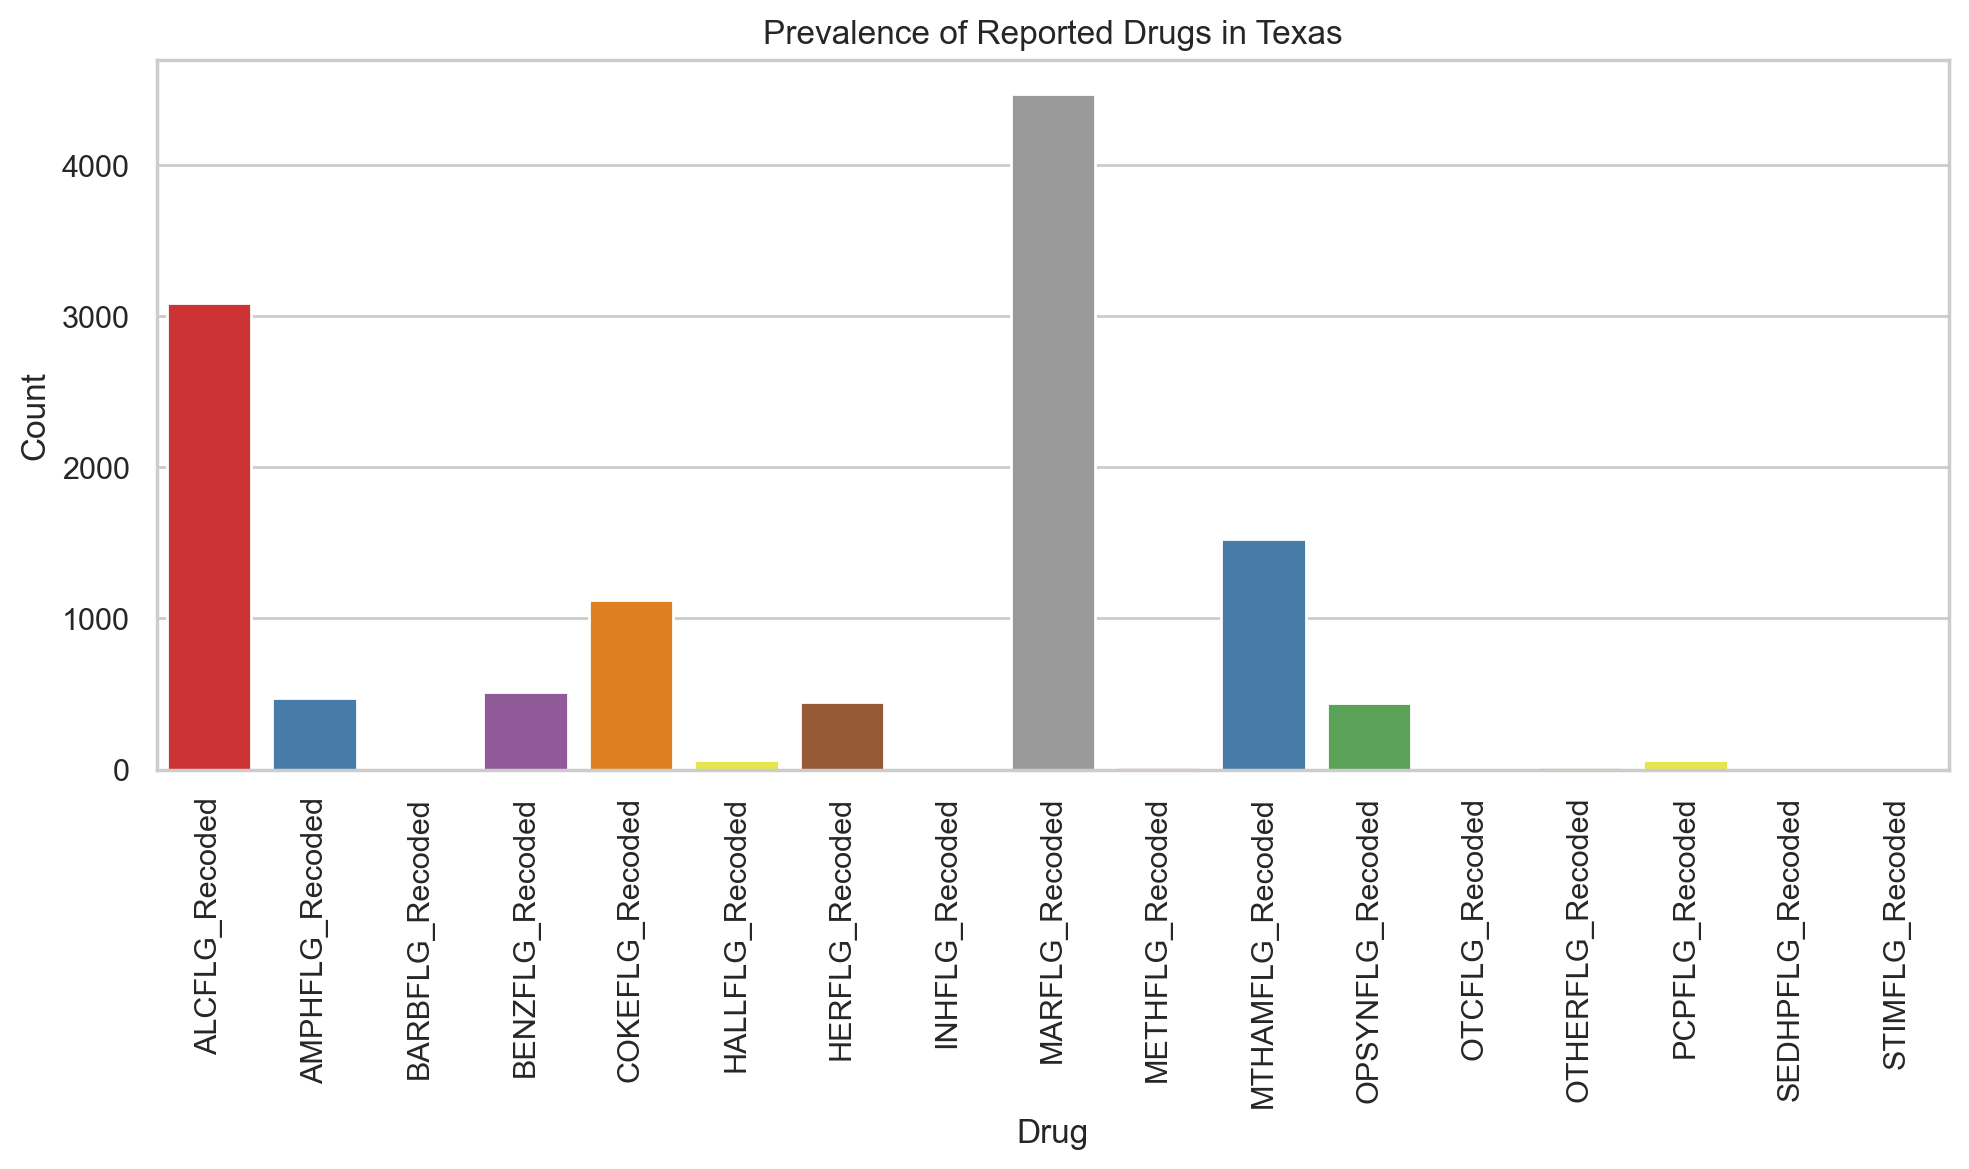

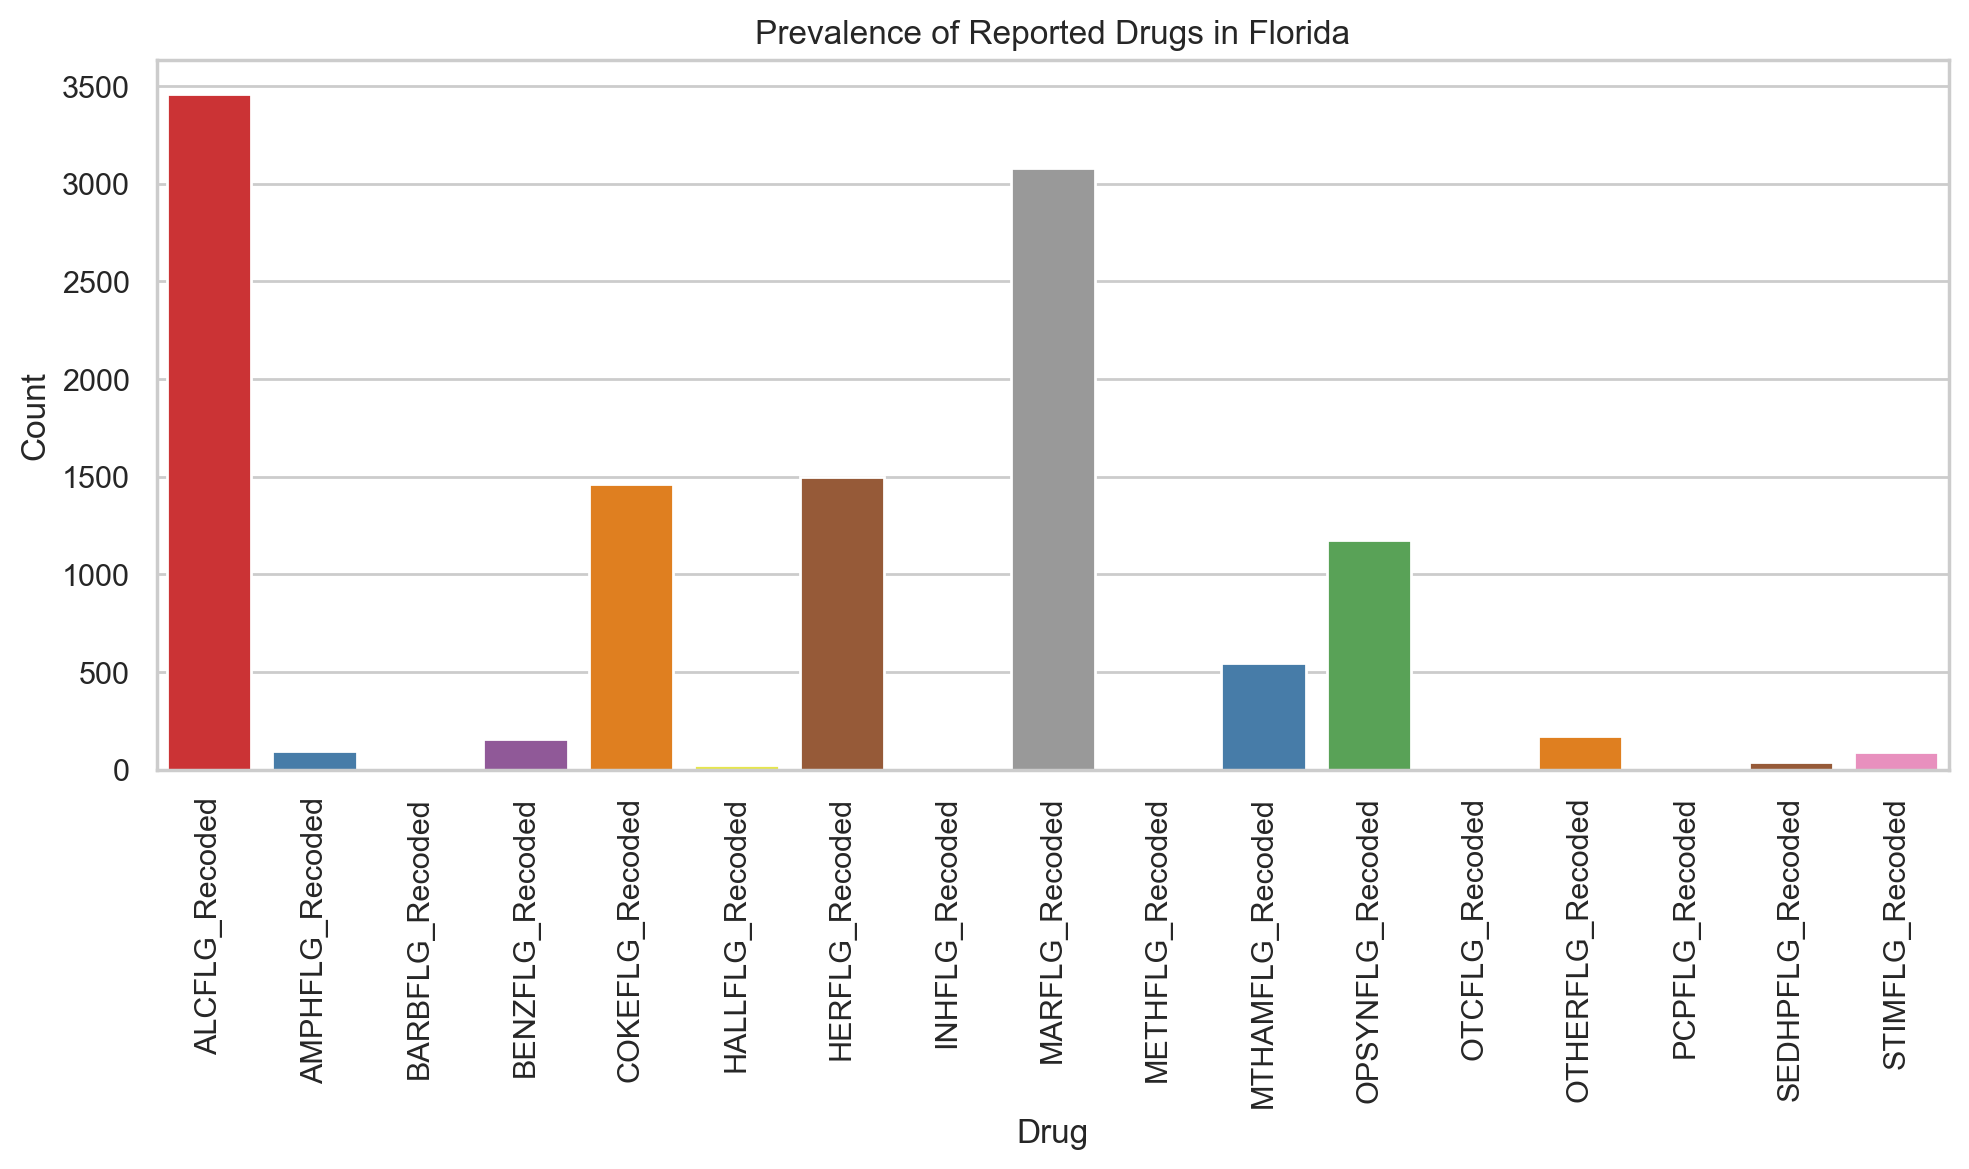

In [79]:
# List of drug columns to be considered
drug_columns = ['ALCFLG_Recoded', 'COKEFLG_Recoded', 'MARFLG_Recoded', 'HERFLG_Recoded',
                'METHFLG_Recoded', 'OPSYNFLG_Recoded', 'PCPFLG_Recoded', 'HALLFLG_Recoded',
                'MTHAMFLG_Recoded', 'AMPHFLG_Recoded', 'STIMFLG_Recoded', 'BENZFLG_Recoded',
                'TRNQFLG_Recoded', 'BARBFLG_Recoded', 'SEDHPFLG_Recoded', 'INHFLG_Recoded',
                'OTCFLG_Recoded', 'OTHERFLG_Recoded']

# Melt the DataFrame to combine drug columns into a single column
melted_df = teds_no_prior_state_pop_complete.melt(id_vars=['state'], value_vars=drug_columns, var_name='Drug', value_name='Reported')

# Filter out non-reported drugs
melted_df = melted_df[melted_df['Reported'] == "Substance reported"]

# List of states to focus on
states_to_focus = ['New York', 'California', 'Texas', 'Florida']

# Define a custom color palette with distinct colors
custom_palette = sns.color_palette("Set1", n_colors=len(drug_columns))

# Loop through selected states and create individual bar plots
for state in states_to_focus:
    state_data = melted_df[melted_df['state'] == state]
    drug_count = state_data['Drug'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=drug_count.index, y=drug_count.values, palette=custom_palette)
    plt.title(f'Prevalence of Reported Drugs in {state}')
    plt.xlabel('Drug')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


Looking at a few states it is evident that some drugs are more prevalent in certain states. And from previous analysis we saw that certain drugs are likely asssociated with variation in treatment completion rates.
